In [1]:
!pip install ucimlrepo

In [2]:
from ucimlrepo import fetch_ucirepo
import pandas as pd
import numpy as np

# Fetch dataset
adult = fetch_ucirepo(id=2)

# Data (as pandas dataframes)
X = adult.data.features
y = adult.data.targets

# 1. First filter missing values from features
columns_to_check = ['workclass', 'native-country', 'occupation']
mask = (~X[columns_to_check].isin(['?']) & ~X[columns_to_check].isna()).all(axis=1)
filtered_X = X[mask].copy()
filtered_y = y[mask].copy()

# 2. Then clean the income column in the filtered data
filtered_y['income'] = filtered_y['income'].str.rstrip('.')

# Verification
print("Missing values filtered:", f"from {len(X)} to {len(filtered_X)} rows")
print("Unique income values after cleaning:", filtered_y['income'].unique())
print("\nValue counts:")
print(filtered_y['income'].value_counts())

Missing values filtered: from 48842 to 45222 rows
Unique income values after cleaning: ['<=50K' '>50K']

Value counts:
income
<=50K    34014
>50K     11208
Name: count, dtype: int64


In [4]:
X.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba


In [5]:
X.describe()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week
count,48842.000000,4.884200e+04,48842.000000,48842.000000,48842.000000,48842.000000
mean,38.643585,1.896641e+05,10.078089,1079.067626,87.502314,40.422382
std,13.710510,1.056040e+05,2.570973,7452.019058,403.004552,12.391444
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.175505e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.781445e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.376420e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.490400e+06,16.000000,99999.000000,4356.000000,99.000000


In [6]:
y.head()

,income
0,<=50K
1,<=50K
2,<=50K
3,<=50K
4,<=50K


In [7]:
y.describe()

,income
count,48842
unique,4
top,<=50K
freq,24720


In [8]:
y = y['income'].str.rstrip('.')
y.describe()

,income
count,48842
unique,2
top,<=50K
freq,37155


In [9]:
filtered_y.describe()

,income
count,45222
unique,2
top,<=50K
freq,34014


Text(0, 0.5, 'Count')

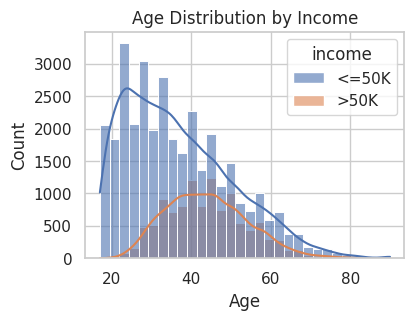

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the style for better-looking plots
sns.set(style="whitegrid")
plt.figure(figsize=(14, 10))

# 1. Age distribution by income
plt.subplot(3, 3, 1)
sns.histplot(data=filtered_X.join(filtered_y), x='age', hue='income', bins=30, kde=True, alpha=0.6)
plt.title('Age Distribution by Income')
plt.xlabel('Age')
plt.ylabel('Count')

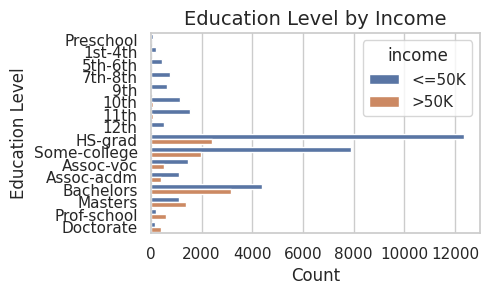

In [11]:
plt.figure(figsize=(12, 8))  # Adjust width and height as needed
plt.subplot(3, 3, 1)
edu_order = ['Preschool', '1st-4th', '5th-6th', '7th-8th', '9th', '10th', '11th', '12th', 'HS-grad',
             'Some-college', 'Assoc-voc', 'Assoc-acdm', 'Bachelors', 'Masters', 'Prof-school', 'Doctorate']
sns.countplot(data=filtered_X.join(filtered_y), y='education', hue='income', order=edu_order)
plt.title('Education Level by Income', fontsize=14)
plt.xlabel('Count', fontsize=12)
plt.ylabel('Education Level', fontsize=12)
plt.tight_layout()  # This helps prevent label overlapping

## Mean Age by education level

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import time

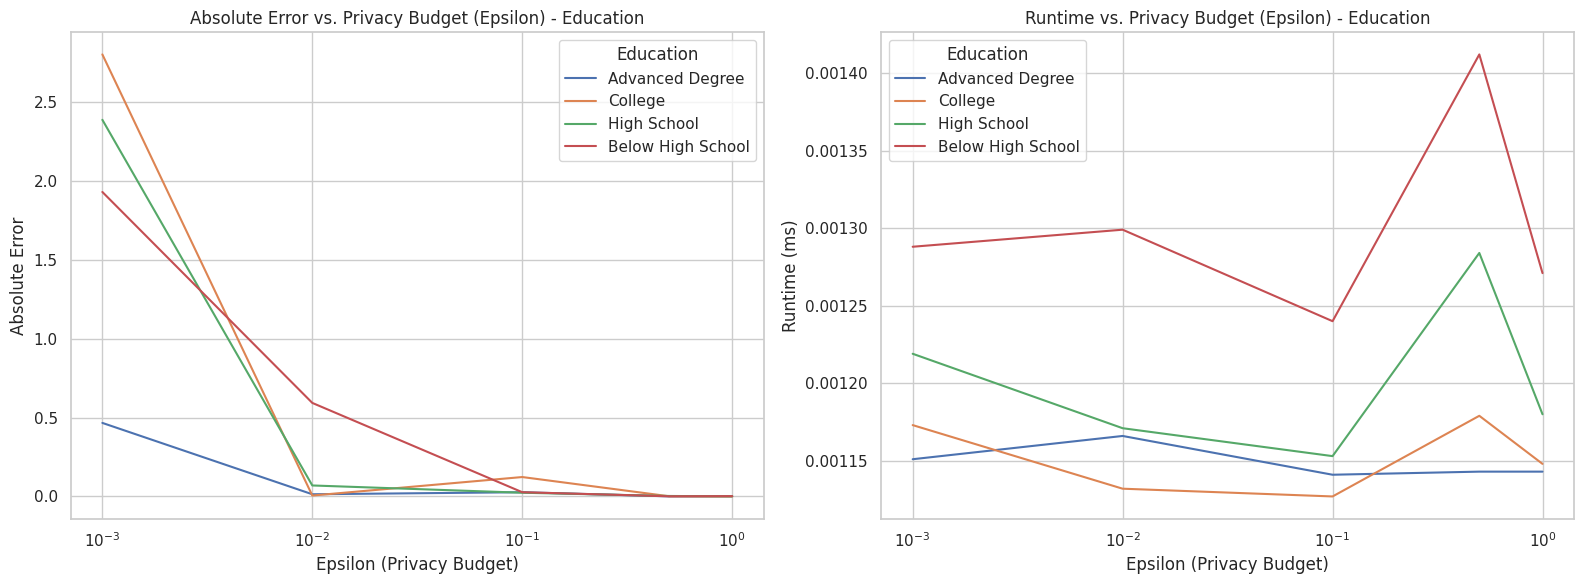

In [16]:
# Create a combined DataFrame for easier analysis
combined_df = pd.concat([filtered_X, filtered_y], axis=1)

# Simplify education levels
def simplify_education(edu):
    if edu in ['Doctorate', 'Masters', 'Prof-school']:
        return 'Advanced Degree'
    elif edu in ['Bachelors', 'Assoc-acdm', 'Assoc-voc']:
        return 'College'
    elif edu in ['HS-grad', 'Some-college']:
        return 'High School'
    else:
        return 'Below High School'

# Add simplified education column
combined_df['education_level'] = combined_df['education'].apply(simplify_education)

# Define privacy budgets (adjusted to match your request)
epsilon_values = [0.001, 0.01, 0.1, 0.5, 1.0]

# Laplace mechanism for differential privacy
def laplace_mechanism(value, epsilon, sensitivity):
    scale = sensitivity / epsilon
    noise = np.random.laplace(0, scale)
    return value + noise

# Measure runtime
def measure_runtime(func, value, epsilon, sensitivity, num_iterations=1000):
    start_time = time.time()
    for _ in range(num_iterations):
        func(value, epsilon, sensitivity)
    end_time = time.time()
    return ((end_time - start_time) / num_iterations) * 1000  # ms

# Calculate results
results = []
np.random.seed(42)
education_levels = ['Advanced Degree', 'College', 'High School', 'Below High School']

# Sensitivity for mean age (assuming age range is 0-100)
sensitivity = (combined_df['age'].max() - combined_df['age'].min()) / len(combined_df)

for edu_level in education_levels:
    subset = combined_df[combined_df['education_level'] == edu_level]

    for epsilon in epsilon_values:
        # Calculate true mean age
        true_mean_age = subset['age'].mean()

        # Apply Laplace mechanism
        dp_mean_age = laplace_mechanism(true_mean_age, epsilon, sensitivity)

        # Measure runtime
        runtime = measure_runtime(laplace_mechanism, true_mean_age, epsilon, sensitivity)

        # Calculate absolute error
        abs_error = abs(true_mean_age - dp_mean_age)

        results.append({
            'Education': edu_level,
            'Epsilon': epsilon,
            'True Mean Age': true_mean_age,
            'DP Mean Age': dp_mean_age,
            'Absolute Error': abs_error,
            'Runtime (ms)': round(runtime, 6)
        })

results_df = pd.DataFrame(results)

# Create a figure with two subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))

# Plot 1: Absolute Error - Line plot with markers
sns.lineplot(x='Epsilon', y='Absolute Error', hue='Education',
             markers=True, dashes=False, data=results_df, ax=ax1)
ax1.set_title('Absolute Error vs. Privacy Budget (Epsilon) - Education')
ax1.set_xlabel('Epsilon (Privacy Budget)')
ax1.set_ylabel('Absolute Error')
ax1.set_xscale('log')  # Log scale makes the epsilon values more evenly spaced

# Plot 2: Runtime - Line plot with markers
sns.lineplot(x='Epsilon', y='Runtime (ms)', hue='Education',
             markers=True, dashes=False, data=results_df, ax=ax2)
ax2.set_title('Runtime vs. Privacy Budget (Epsilon) - Education')
ax2.set_xlabel('Epsilon (Privacy Budget)')
ax2.set_ylabel('Runtime (ms)')
ax2.set_xscale('log')

plt.tight_layout()
plt.show()

In [17]:
print(sensitivity)

0.0016142585467250454


In [18]:
combined_df['age'].max()

90

In [19]:
combined_df['age'].min()

17

In [20]:
results_df


,Education,Epsilon,True Mean Age,DP Mean Age,Absolute Error,Runtime (ms)
0,Advanced Degree,0.001,44.408015,43.941640,0.466374,0.001151
1,Advanced Degree,0.010,44.408015,44.422143,0.014128,0.001166
2,Advanced Degree,0.100,44.408015,44.435038,0.027023,0.001141
3,Advanced Degree,0.500,44.408015,44.408942,0.000928,0.001143
4,Advanced Degree,1.000,44.408015,44.406063,0.001952,0.001143
5,College,0.001,38.455509,35.653568,2.801941,0.001173
6,College,0.010,38.455509,38.461550,0.006041,0.001132
7,College,0.100,38.455509,38.332219,0.123290,0.001127
8,College,0.500,38.455509,38.457089,0.001580,0.001179
9,College,1.000,38.455509,38.455789,0.000280,0.001148


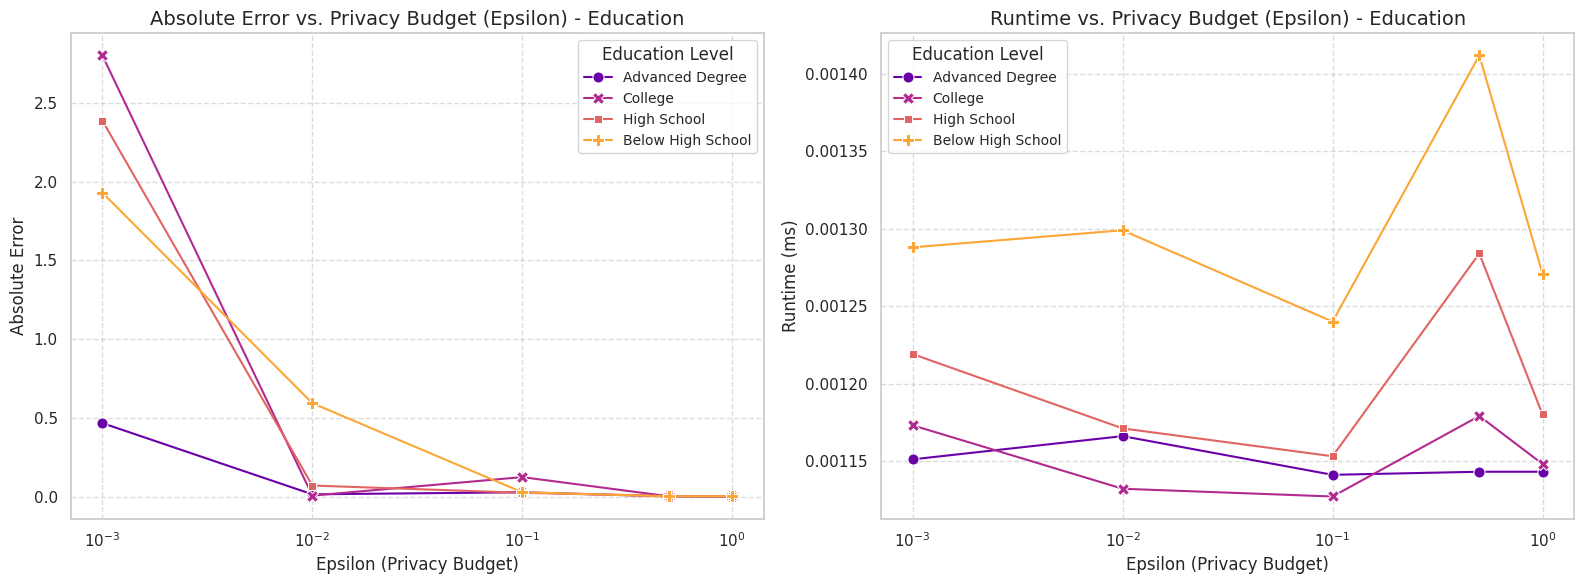

In [22]:
# Visually appealling plot

# Create a figure with two subplots
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Plot 1: Absolute Error - Line plot with markers
sns.lineplot(x='Epsilon', y='Absolute Error', hue='Education',
             markers=True, markersize=8, style='Education', dashes=False,
             palette='plasma', data=results_df, ax=axes[0])
axes[0].set_title('Absolute Error vs. Privacy Budget (Epsilon) - Education', fontsize=14)
axes[0].set_xlabel('Epsilon (Privacy Budget)', fontsize=12)
axes[0].set_ylabel('Absolute Error', fontsize=12)
axes[0].set_xscale('log')
axes[0].legend(title='Education Level', fontsize=10)
axes[0].grid(True, linestyle='--', alpha=0.7)  # Add gridlines

# Plot 2: Runtime - Line plot with markers
sns.lineplot(x='Epsilon', y='Runtime (ms)', hue='Education',
             markers=True, markersize=8, style='Education', dashes=False,
             palette='plasma', data=results_df, ax=axes[1])
axes[1].set_title('Runtime vs. Privacy Budget (Epsilon) - Education', fontsize=14)
axes[1].set_xlabel('Epsilon (Privacy Budget)', fontsize=12)
axes[1].set_ylabel('Runtime (ms)', fontsize=12)
axes[1].set_xscale('log')
axes[1].legend(title='Education Level', fontsize=10)
axes[1].grid(True, linestyle='--', alpha=0.7) # Add gridlines

plt.tight_layout()
plt.show()

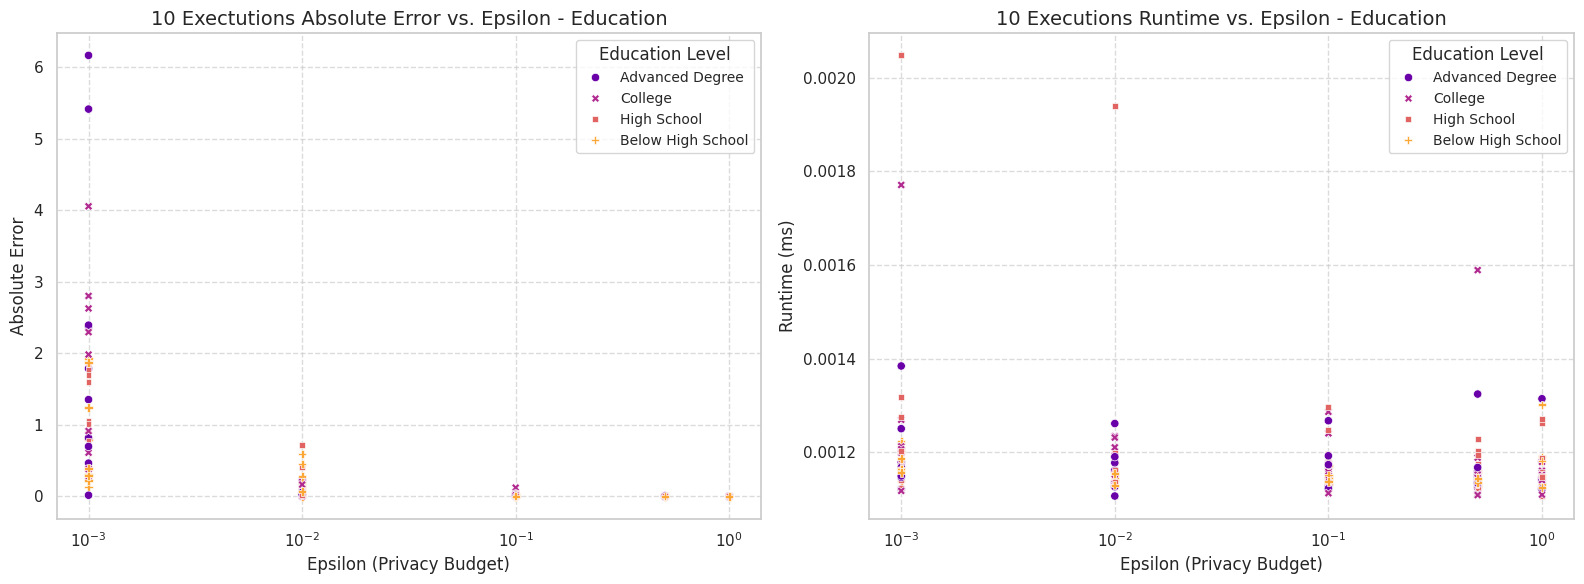

In [38]:
#For 10 exections
# Create a combined DataFrame for easier analysis
combined_df = pd.concat([filtered_X, filtered_y], axis=1)

# Simplify education levels
def simplify_education(edu):
    if edu in ['Doctorate', 'Masters', 'Prof-school']:
        return 'Advanced Degree'
    elif edu in ['Bachelors', 'Assoc-acdm', 'Assoc-voc']:
        return 'College'
    elif edu in ['HS-grad', 'Some-college']:
        return 'High School'
    else:
        return 'Below High School'

# Add simplified education column
combined_df['education_level'] = combined_df['education'].apply(simplify_education)

# Define privacy budgets (adjusted to match your request)
epsilon_values = [0.001, 0.01, 0.1, 0.5, 1.0]

# Laplace mechanism for differential privacy
def laplace_mechanism(value, epsilon, sensitivity):
    scale = sensitivity / epsilon
    noise = np.random.laplace(0, scale)
    return value + noise

# Measure runtime
def measure_runtime(func, value, epsilon, sensitivity, num_iterations=1000):
    start_time = time.time()
    for _ in range(num_iterations):
        func(value, epsilon, sensitivity)
    end_time = time.time()
    return ((end_time - start_time) / num_iterations) * 1000  # ms

# Calculate results with multiple executions
num_executions = 10
results = []

# Store true mean age for each education level
true_mean_ages = {}

for edu_level in education_levels:
    subset = combined_df[combined_df['education_level'] == edu_level]
    true_mean_ages[edu_level] = subset['age'].mean()  # Store true mean age

for i in range(num_executions):  # Loop for multiple executions
    np.random.seed(42 + i)  # Different seed for each execution

    for edu_level in education_levels:
        subset = combined_df[combined_df['education_level'] == edu_level]

        for epsilon in epsilon_values:
            # Apply Laplace mechanism
            dp_mean_age = laplace_mechanism(subset['age'].mean(), epsilon, sensitivity)

            # Measure runtime
            runtime = measure_runtime(laplace_mechanism, subset['age'].mean(), epsilon, sensitivity)

            # Calculate absolute error using stored true_mean_age
            abs_error = abs(true_mean_ages[edu_level] - dp_mean_age)

            results.append({
                'Education': edu_level,
                'Epsilon': epsilon,
                'Execution': i + 1,  # Add execution number
                'True Mean Age': true_mean_ages[edu_level],  # Access stored true mean age
                'DP Mean Age': dp_mean_age,
                'Absolute Error': abs_error,
                'Runtime (ms)': round(runtime, 6)
            })

results_df = pd.DataFrame(results)

# ... (Plotting code, adjust for multiple executions) ...

# Create a figure with two subplots
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Plot 1: Absolute Error
sns.scatterplot(x='Epsilon', y='Absolute Error', hue='Education',
             marker='o', style='Education', palette='plasma',
             data=results_df, ax=axes[0])
axes[0].set_title('10 Exectutions Absolute Error vs. Epsilon - Education', fontsize=14)
axes[0].set_xlabel('Epsilon (Privacy Budget)', fontsize=12)
axes[0].set_ylabel('Absolute Error', fontsize=12)
axes[0].set_xscale('log')
axes[0].legend(title='Education Level', fontsize=10)
axes[0].grid(True, linestyle='--', alpha=0.7)  # Add gridlines

# Plot 2: Runtime
sns.scatterplot(x='Epsilon', y='Runtime (ms)', hue='Education',
             marker='o', style='Education', palette='plasma',
             data=results_df, ax=axes[1]) # Remove units='Execution'
axes[1].set_title('10 Executions Runtime vs. Epsilon - Education', fontsize=14)
axes[1].set_xlabel('Epsilon (Privacy Budget)', fontsize=12)
axes[1].set_ylabel('Runtime (ms)', fontsize=12)
axes[1].set_xscale('log')
axes[1].legend(title='Education Level', fontsize=10)
axes[1].grid(True, linestyle='--', alpha=0.7) # Add gridlines

plt.tight_layout()
plt.show()

In [39]:
results_df

,Education,Epsilon,Execution,True Mean Age,DP Mean Age,Absolute Error,Runtime (ms)
0,Advanced Degree,0.001,1,44.408015,43.941640,4.663741e-01,0.001198
1,Advanced Degree,0.010,1,44.408015,44.422143,1.412842e-02,0.001189
2,Advanced Degree,0.100,1,44.408015,44.435038,2.702310e-02,0.001267
3,Advanced Degree,0.500,1,44.408015,44.408942,9.277027e-04,0.001324
4,Advanced Degree,1.000,1,44.408015,44.406063,1.951621e-03,0.001180
...,...,...,...,...,...,...,...
195,Below High School,0.001,10,38.335630,38.624744,2.891142e-01,0.001156
196,Below High School,0.010,10,38.335630,38.406453,7.082282e-02,0.001129
197,Below High School,0.100,10,38.335630,38.338061,2.431044e-03,0.001137
198,Below High School,0.500,10,38.335630,38.338706,3.076671e-03,0.001144


## LDP for mean age by education level

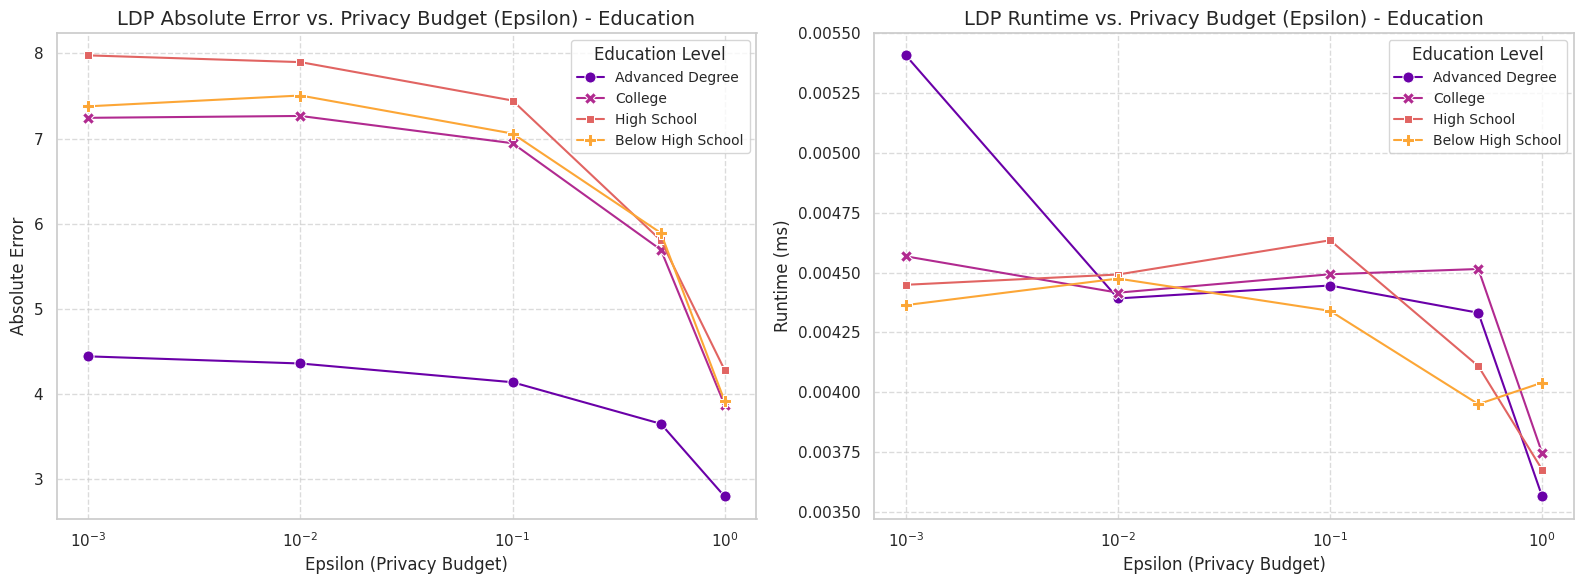

In [46]:

# Create a combined DataFrame for easier analysis
combined_df = pd.concat([filtered_X, filtered_y], axis=1)

# Simplify education levels
def simplify_education(edu):
    if edu in ['Doctorate', 'Masters', 'Prof-school']:
        return 'Advanced Degree'
    elif edu in ['Bachelors', 'Assoc-acdm', 'Assoc-voc']:
        return 'College'
    elif edu in ['HS-grad', 'Some-college']:
        return 'High School'
    else:
        return 'Below High School'

# Add simplified education column
combined_df['education_level'] = combined_df['education'].apply(simplify_education)
# Define epsilon values for Local Differential Privacy
epsilon_values_ldp = [0.001, 0.01, 0.1, 0.5, 1.0]

# Randomized Response mechanism for Local Differential Privacy
def randomized_response(value, epsilon, domain=[17, 90]):  # Assuming age range
    """
    Implements randomized response for Local Differential Privacy.

    Args:
        value: True age value
        epsilon: Privacy parameter
        domain: Possible age values (min, max)

    Returns:
        Privatized age value
    """
    # Calculate probability of keeping true value
    p = np.exp(epsilon) / (1 + np.exp(epsilon))

    # With probability p, keep the true value
    # With probability 1-p, sample uniformly from the domain
    if np.random.random() < p:
        return value
    else:
        return np.random.randint(domain[0], domain[1] + 1)

# Function to measure runtime
def measure_ldp_runtime(func, value, epsilon, domain, num_iterations=1000):
    start_time = time.time()
    for _ in range(num_iterations):
        func(value, epsilon, domain)
    end_time = time.time()
    return ((end_time - start_time) / num_iterations) * 1000  # ms

# Calculate results for LDP
ldp_results = []
np.random.seed(42)  # Set seed for reproducibility
education_levels = ['Advanced Degree', 'College', 'High School', 'Below High School']

for edu_level in education_levels:
    subset = combined_df[combined_df['education_level'] == edu_level]

    for epsilon in epsilon_values_ldp:
        # Measure average runtime
        sample_age = 30  # Arbitrary sample age for runtime measurement
        runtime = measure_ldp_runtime(randomized_response, sample_age, epsilon, [17, 90])

        # Apply randomized response to each individual's age
        privatized_ages = [randomized_response(age, epsilon, [17, 90]) for age in subset['age']]

        # Calculate mean of privatized ages
        ldp_mean_age = np.mean(privatized_ages)

        # Calculate true mean age for comparison
        true_mean_age = subset['age'].mean()

        # Calculate error metrics
        abs_error = abs(true_mean_age - ldp_mean_age)

        ldp_results.append({
            'Education': edu_level,
            'Epsilon': epsilon,
            'True Mean Age': true_mean_age,
            'LDP Mean Age': ldp_mean_age,
            'Absolute Error': abs_error,
            'Runtime (ms)': round(runtime, 6)
        })

ldp_results_df = pd.DataFrame(ldp_results)

# Create a figure with two subplots
fig, axes = plt.subplots(1, 2, figsize=(16, 6))
# Plot 1: Absolute Error - Line plot with markers
sns.lineplot(x='Epsilon', y='Absolute Error', hue='Education',
             markers=True, markersize=8, style='Education', dashes=False,
             palette='plasma', data=ldp_results_df, ax=axes[0])
axes[0].set_title('LDP Absolute Error vs. Privacy Budget (Epsilon) - Education', fontsize=14)
axes[0].set_xlabel('Epsilon (Privacy Budget)', fontsize=12)
axes[0].set_ylabel('Absolute Error', fontsize=12)
axes[0].set_xscale('log')
axes[0].legend(title='Education Level', fontsize=10)
axes[0].grid(True, linestyle='--', alpha=0.7)  # Add gridlines

# Plot 2: Runtime - Line plot with markers
sns.lineplot(x='Epsilon', y='Runtime (ms)', hue='Education',
             markers=True, markersize=8, style='Education', dashes=False,
             palette='plasma', data=ldp_results_df, ax=axes[1])
axes[1].set_title('LDP Runtime vs. Privacy Budget (Epsilon) - Education', fontsize=14)
axes[1].set_xlabel('Epsilon (Privacy Budget)', fontsize=12)
axes[1].set_ylabel('Runtime (ms)', fontsize=12)
axes[1].set_xscale('log')
axes[1].legend(title='Education Level', fontsize=10)
axes[1].grid(True, linestyle='--', alpha=0.7) # Add gridlines

plt.tight_layout()
plt.show()

In [47]:
ldp_results_df

,Education,Epsilon,True Mean Age,LDP Mean Age,Absolute Error,Runtime (ms)
0,Advanced Degree,0.001,44.408015,48.848816,4.440801,0.005408
1,Advanced Degree,0.010,44.408015,48.765027,4.357013,0.004392
2,Advanced Degree,0.100,44.408015,48.544887,4.136872,0.004446
3,Advanced Degree,0.500,44.408015,48.056727,3.648712,0.004332
4,Advanced Degree,1.000,44.408015,47.202446,2.794431,0.003564
5,College,0.001,38.455509,45.698713,7.243204,0.004568
6,College,0.010,38.455509,45.720642,7.265132,0.004416
7,College,0.100,38.455509,45.400236,6.944726,0.004493
8,College,0.500,38.455509,44.149329,5.693820,0.004515
9,College,1.000,38.455509,42.322852,3.867343,0.003745


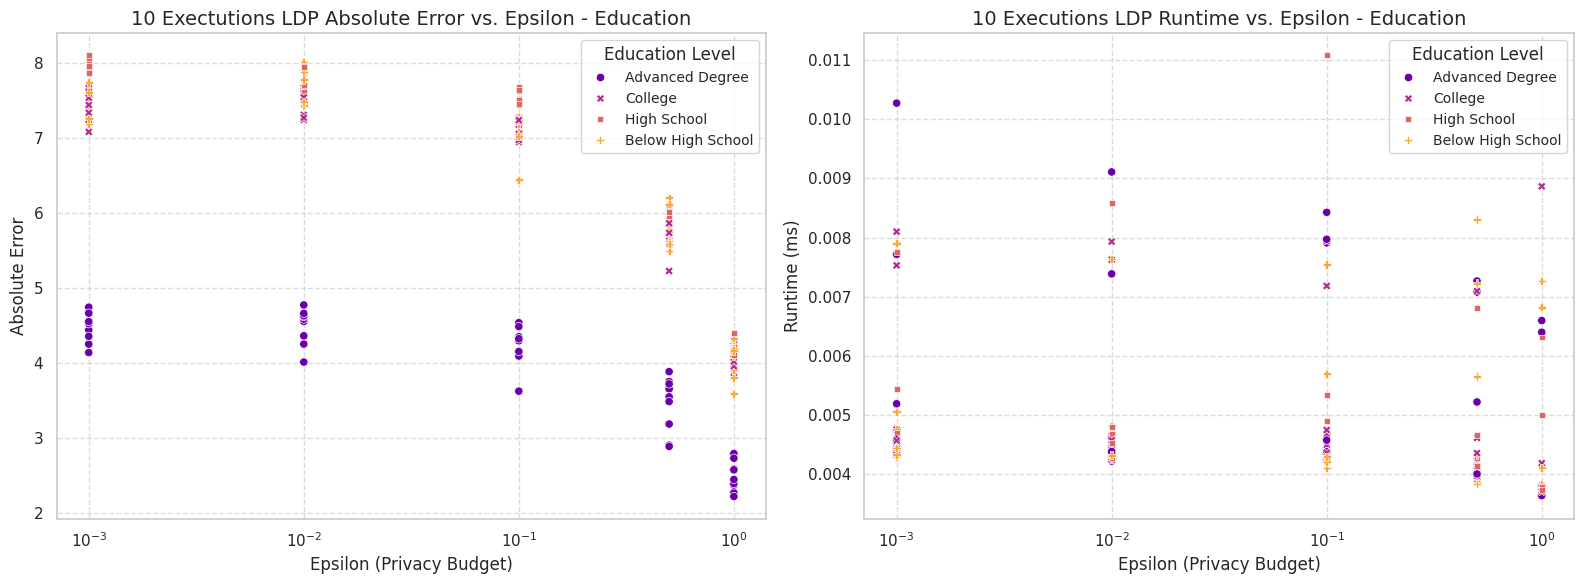

In [49]:
# for 10 executions
# Create a combined DataFrame for easier analysis
combined_df = pd.concat([filtered_X, filtered_y], axis=1)

# Simplify education levels
def simplify_education(edu):
    if edu in ['Doctorate', 'Masters', 'Prof-school']:
        return 'Advanced Degree'
    elif edu in ['Bachelors', 'Assoc-acdm', 'Assoc-voc']:
        return 'College'
    elif edu in ['HS-grad', 'Some-college']:
        return 'High School'
    else:
        return 'Below High School'

# Add simplified education column
combined_df['education_level'] = combined_df['education'].apply(simplify_education)
# Define epsilon values for Local Differential Privacy
epsilon_values_ldp = [0.001, 0.01, 0.1, 0.5, 1.0]

# Randomized Response mechanism for Local Differential Privacy
def randomized_response(value, epsilon, domain=[17, 90]):  # Assuming age range
    """
    Implements randomized response for Local Differential Privacy.

    Args:
        value: True age value
        epsilon: Privacy parameter
        domain: Possible age values (min, max)

    Returns:
        Privatized age value
    """
    # Calculate probability of keeping true value
    p = np.exp(epsilon) / (1 + np.exp(epsilon))

    # With probability p, keep the true value
    # With probability 1-p, sample uniformly from the domain
    if np.random.random() < p:
        return value
    else:
        return np.random.randint(domain[0], domain[1] + 1)

# Function to measure runtime
def measure_ldp_runtime(func, value, epsilon, domain, num_iterations=1000):
    start_time = time.time()
    for _ in range(num_iterations):
        func(value, epsilon, domain)
    end_time = time.time()
    return ((end_time - start_time) / num_iterations) * 1000  # ms

# Calculate results for LDP with multiple executions
num_executions = 10
ldp_results = []
np.random.seed(42)  # Set seed for reproducibility
education_levels = ['Advanced Degree', 'College', 'High School', 'Below High School']

for execution in range(num_executions):
    for edu_level in education_levels:
        subset = combined_df[combined_df['education_level'] == edu_level]

        for epsilon in epsilon_values_ldp:
            # Measure average runtime
            sample_age = 30  # Arbitrary sample age for runtime measurement
            runtime = measure_ldp_runtime(randomized_response, sample_age, epsilon, [17, 90])

            # Apply randomized response to each individual's age
            privatized_ages = [randomized_response(age, epsilon, [17, 90]) for age in subset['age']]

            # Calculate mean of privatized ages
            ldp_mean_age = np.mean(privatized_ages)

            # Calculate true mean age for comparison
            true_mean_age = subset['age'].mean()

            # Calculate error metrics
            abs_error = abs(true_mean_age - ldp_mean_age)

            ldp_results.append({
                'Education': edu_level,
                'Epsilon': epsilon,
                'Execution': execution + 1,  # Add execution number
                'True Mean Age': true_mean_age,
                'LDP Mean Age': ldp_mean_age,
                'Absolute Error': abs_error,
                'Runtime (ms)': round(runtime, 6)
            })

ldp_results_df = pd.DataFrame(ldp_results)

# Create a figure with two subplots
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Plot 1: Absolute Error
sns.scatterplot(x='Epsilon', y='Absolute Error', hue='Education',
             marker='o', style='Education', palette='plasma',
             data=ldp_results_df, ax=axes[0])
axes[0].set_title('10 Exectutions LDP Absolute Error vs. Epsilon - Education', fontsize=14)
axes[0].set_xlabel('Epsilon (Privacy Budget)', fontsize=12)
axes[0].set_ylabel('Absolute Error', fontsize=12)
axes[0].set_xscale('log')
axes[0].legend(title='Education Level', fontsize=10)
axes[0].grid(True, linestyle='--', alpha=0.7)  # Add gridlines

# Plot 2: Runtime
sns.scatterplot(x='Epsilon', y='Runtime (ms)', hue='Education',
             marker='o', style='Education', palette='plasma',
             data=ldp_results_df, ax=axes[1]) # Remove units='Execution'
axes[1].set_title('10 Executions LDP Runtime vs. Epsilon - Education', fontsize=14)
axes[1].set_xlabel('Epsilon (Privacy Budget)', fontsize=12)
axes[1].set_ylabel('Runtime (ms)', fontsize=12)
axes[1].set_xscale('log')
axes[1].legend(title='Education Level', fontsize=10)
axes[1].grid(True, linestyle='--', alpha=0.7) # Add gridlines

plt.tight_layout()
plt.show()

## Mean Working Hours by Race

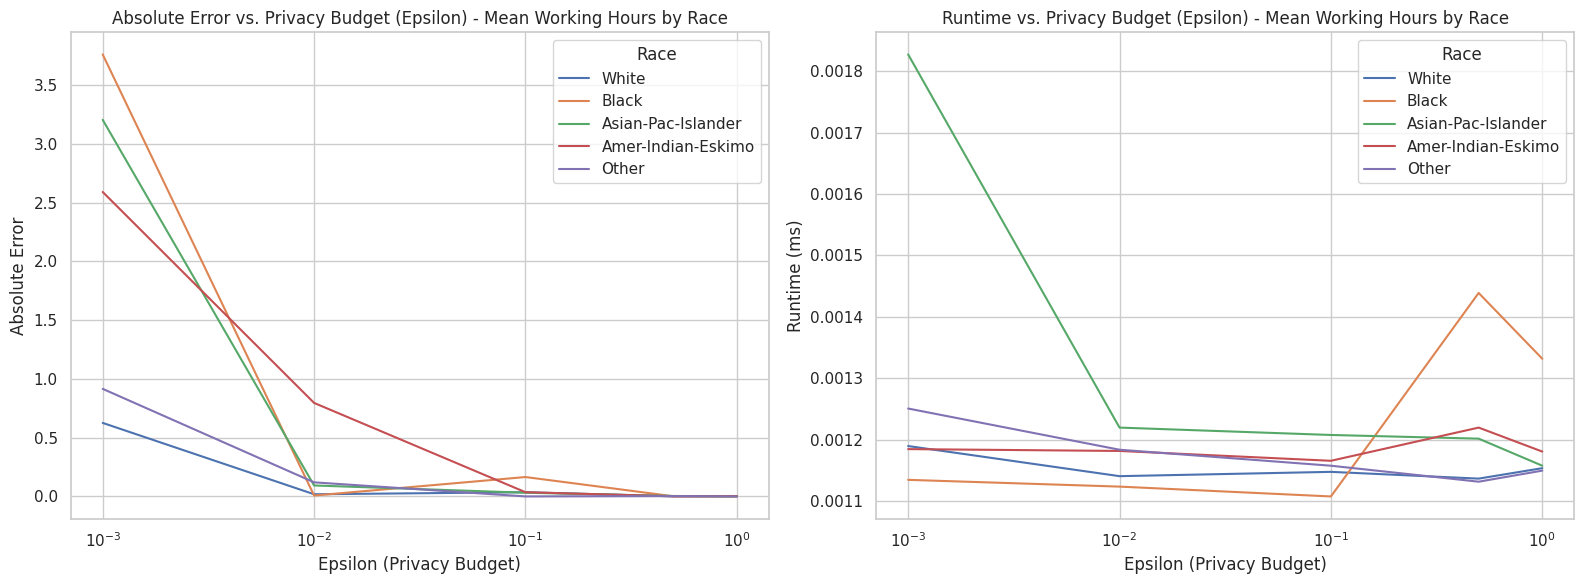

In [28]:
# Create a combined DataFrame for easier analysis
combined_df = pd.concat([filtered_X, filtered_y], axis=1)

# Define privacy budgets
epsilon_values = [0.001, 0.01, 0.1, 0.5, 1]

# Laplace mechanism for differential privacy
def laplace_mechanism(value, epsilon, sensitivity):
    scale = sensitivity / epsilon
    noise = np.random.laplace(0, scale)
    return value + noise  # Now returns the noisy value directly

# Measure runtime
def measure_runtime(func, value, epsilon, num_iterations=1000):
    start_time = time.time()
    for _ in range(num_iterations):
        func(value, epsilon, sensitivity)
    end_time = time.time()
    return ((end_time - start_time) / num_iterations) * 1000  # ms

# Calculate results
results = []
np.random.seed(42)

# Get unique races
races = combined_df['race'].unique()

# Sensitivity for mean working hours (assuming range 0-100)
sensitivity = (combined_df['hours-per-week'].max() - combined_df['hours-per-week'].min()) / len(combined_df)

for race in races:
    # Calculate true mean working hours for the race
    true_mean_hours = combined_df[combined_df['race'] == race]['hours-per-week'].mean()

    for epsilon in epsilon_values:
        # Apply Laplace mechanism to the mean
        dp_mean_hours = laplace_mechanism(true_mean_hours, epsilon, sensitivity)

        # Measure runtime
        runtime = measure_runtime(laplace_mechanism, true_mean_hours, epsilon)

        # Calculate absolute error
        abs_error = abs(true_mean_hours - dp_mean_hours)

        results.append({
            'Race': race,
            'Epsilon': epsilon,
            'True Mean Hours': true_mean_hours,
            'DP Mean Hours': dp_mean_hours,
            'Absolute Error': abs_error,
            'Runtime (ms)': round(runtime, 6)
        })

results_df = pd.DataFrame(results)

# Create a figure with two subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))

# Plot 1: Absolute Error - Line plot with markers
sns.lineplot(x='Epsilon', y='Absolute Error', hue='Race',
             markers=True, dashes=False, data=results_df, ax=ax1)
ax1.set_title('Absolute Error vs. Privacy Budget (Epsilon) - Mean Working Hours by Race')
ax1.set_xlabel('Epsilon (Privacy Budget)')
ax1.set_ylabel('Absolute Error')
ax1.set_xscale('log')  # Log scale makes the epsilon values more evenly spaced

# Plot 2: Runtime - Line plot with markers
sns.lineplot(x='Epsilon', y='Runtime (ms)', hue='Race',
             markers=True, dashes=False, data=results_df, ax=ax2)
ax2.set_title('Runtime vs. Privacy Budget (Epsilon) - Mean Working Hours by Race')
ax2.set_xlabel('Epsilon (Privacy Budget)')
ax2.set_ylabel('Runtime (ms)')
ax2.set_xscale('log')

plt.tight_layout()
plt.show()

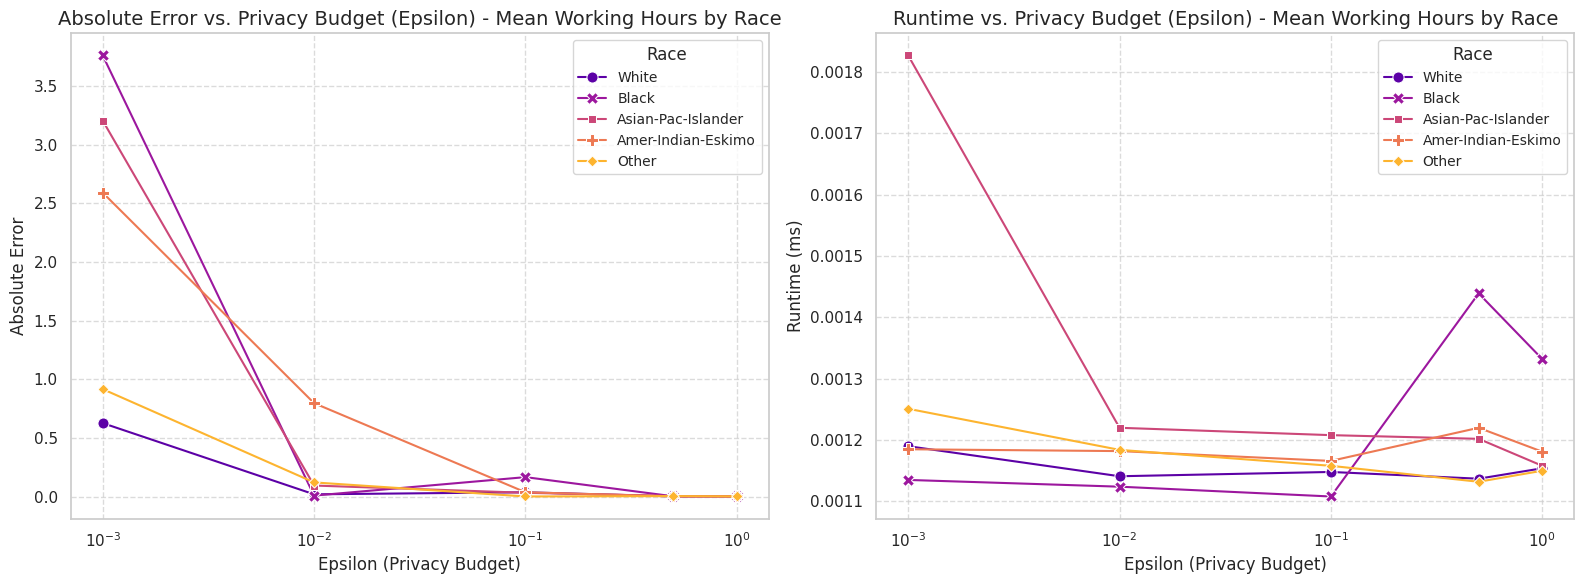

In [29]:
# Create a figure with two subplots
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Plot 1: Absolute Error - Line plot with markers
sns.lineplot(x='Epsilon', y='Absolute Error', hue='Race',
             markers=True, markersize=8, style='Race', dashes=False,
             palette='plasma', data=results_df, ax=axes[0])
axes[0].set_title('Absolute Error vs. Privacy Budget (Epsilon) - Mean Working Hours by Race', fontsize=14)
axes[0].set_xlabel('Epsilon (Privacy Budget)', fontsize=12)
axes[0].set_ylabel('Absolute Error', fontsize=12)
axes[0].set_xscale('log')
axes[0].legend(title='Race', fontsize=10)
axes[0].grid(True, linestyle='--', alpha=0.7)  # Add gridlines

# Plot 2: Runtime - Line plot with markers
sns.lineplot(x='Epsilon', y='Runtime (ms)', hue='Race',
             markers=True, markersize=8, style='Race', dashes=False,
             palette='plasma', data=results_df, ax=axes[1])
axes[1].set_title('Runtime vs. Privacy Budget (Epsilon) - Mean Working Hours by Race', fontsize=14)
axes[1].set_xlabel('Epsilon (Privacy Budget)', fontsize=12)
axes[1].set_ylabel('Runtime (ms)', fontsize=12)
axes[1].set_xscale('log')
axes[1].legend(title='Race', fontsize=10)
axes[1].grid(True, linestyle='--', alpha=0.7) # Add gridlines

plt.tight_layout()
plt.show()

In [62]:
results_df

,Race,Epsilon,True Mean Hours,DP Mean Hours,Absolute Error,Runtime (ms)
0,White,0.001,41.191065,40.564974,0.626091,0.001418
1,White,0.010,41.191065,41.210032,0.018967,0.001172
2,White,0.100,41.191065,41.227343,0.036278,0.001154
3,White,0.500,41.191065,41.192310,0.001245,0.001161
4,White,1.000,41.191065,41.188445,0.002620,0.001157
5,Black,0.001,38.910833,35.149323,3.761510,0.001154
6,Black,0.010,38.910833,38.918942,0.008110,0.001194
7,Black,0.100,38.910833,38.745320,0.165512,0.001164
8,Black,0.500,38.910833,38.912954,0.002121,0.001135
9,Black,1.000,38.910833,38.911208,0.000375,0.001134


In [65]:
sensitivity

0.0021670868161514307

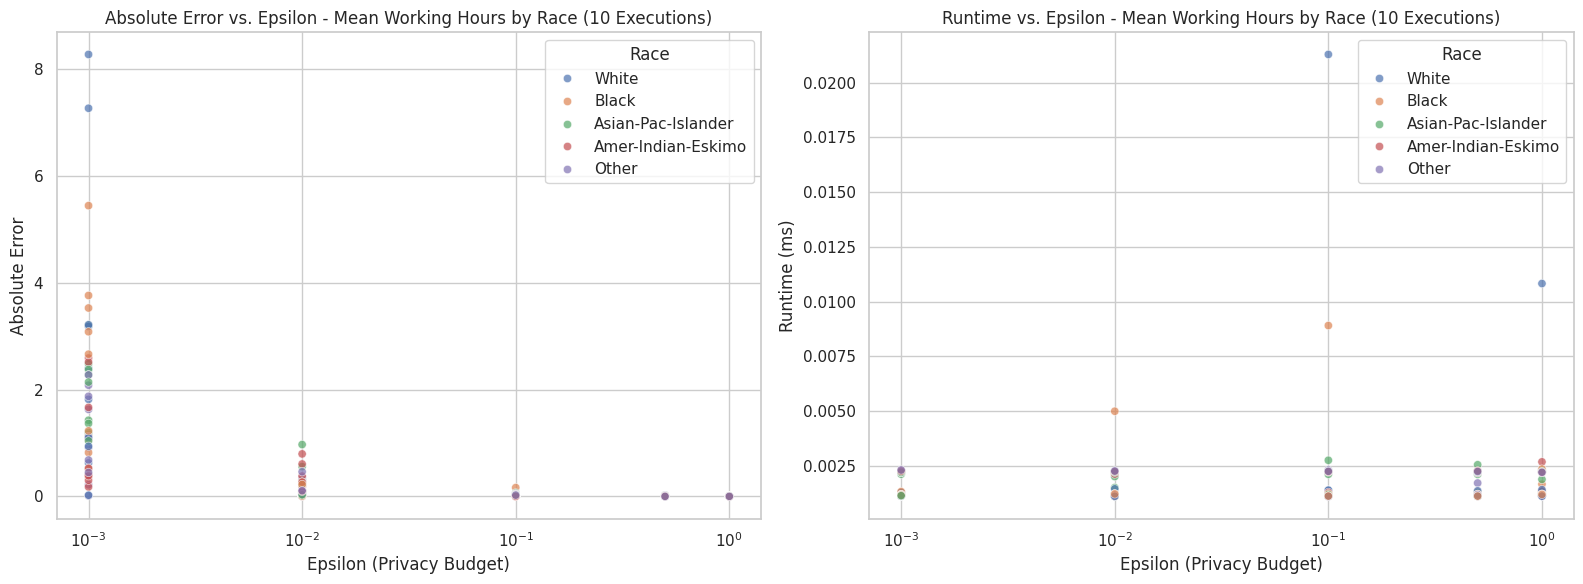

In [33]:
#for 10 executions
# Create a combined DataFrame for easier analysis
combined_df = pd.concat([filtered_X, filtered_y], axis=1)

# Define privacy budgets
epsilon_values = [0.001, 0.01, 0.1, 0.5, 1]

# Laplace mechanism for differential privacy
def laplace_mechanism(value, epsilon, sensitivity):
    scale = sensitivity / epsilon
    noise = np.random.laplace(0, scale)
    return value + noise  # Now returns the noisy value directly

# Measure runtime
def measure_runtime(func, value, epsilon, num_iterations=1000):
    start_time = time.time()
    for _ in range(num_iterations):
        func(value, epsilon, sensitivity)
    end_time = time.time()
    return ((end_time - start_time) / num_iterations) * 1000  # ms

# Calculate results for 10 executions
num_executions = 10
all_results = []  # List to store results from all executions

# Get unique races
races = combined_df['race'].unique()

# Sensitivity for mean working hours (assuming range 0-100)
sensitivity = (combined_df['hours-per-week'].max() - combined_df['hours-per-week'].min()) / len(combined_df)

for execution in range(num_executions):
    np.random.seed(42 + execution)  # Different seed for each execution
    results = []  # Results for this execution

    for race in races:
        true_mean_hours = combined_df[combined_df['race'] == race]['hours-per-week'].mean()

        for epsilon in epsilon_values:
            dp_mean_hours = laplace_mechanism(true_mean_hours, epsilon, sensitivity)
            runtime = measure_runtime(laplace_mechanism, true_mean_hours, epsilon)
            abs_error = abs(true_mean_hours - dp_mean_hours)

            results.append({
                'Race': race,
                'Epsilon': epsilon,
                'Execution': execution + 1,  # Add execution number
                'True Mean Hours': true_mean_hours,
                'DP Mean Hours': dp_mean_hours,
                'Absolute Error': abs_error,
                'Runtime (ms)': round(runtime, 6)
            })

    all_results.extend(results)  # Add results from this execution to the main list

results_df = pd.DataFrame(all_results)  # Create DataFrame from all results

# Create a figure with two subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))

# Plot 1: Absolute Error with spread (using scatterplot)
sns.scatterplot(x='Epsilon', y='Absolute Error', hue='Race',
                data=results_df, ax=ax1, alpha=0.7)  # Use alpha for transparency
ax1.set_title('Absolute Error vs. Epsilon - Mean Working Hours by Race (10 Executions)')
ax1.set_xlabel('Epsilon (Privacy Budget)')
ax1.set_ylabel('Absolute Error')
ax1.set_xscale('log')

# Plot 2: Runtime with spread (using scatterplot)
sns.scatterplot(x='Epsilon', y='Runtime (ms)', hue='Race',
                data=results_df, ax=ax2, alpha=0.7)
ax2.set_title('Runtime vs. Epsilon - Mean Working Hours by Race (10 Executions)')
ax2.set_xlabel('Epsilon (Privacy Budget)')
ax2.set_ylabel('Runtime (ms)')
ax2.set_xscale('log')

plt.tight_layout()
plt.show()

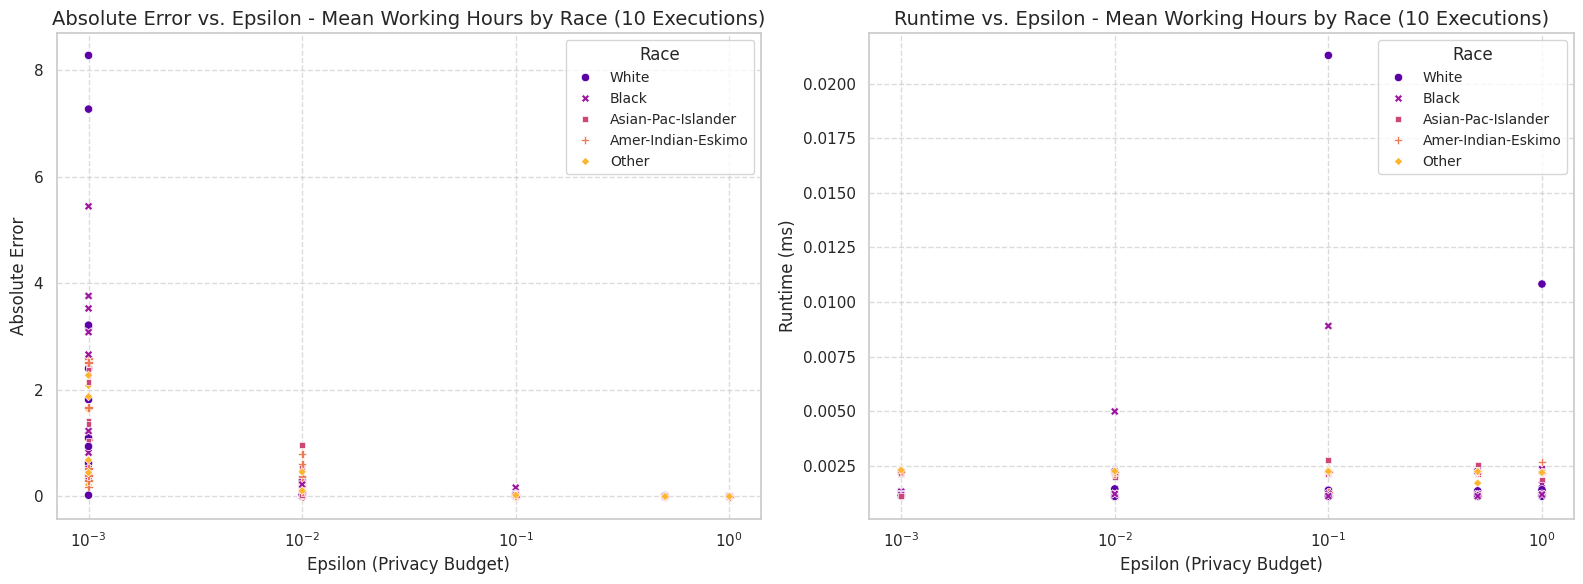

In [37]:
# Better plot

# Create a figure with two subplots
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Plot 1: Absolute Error
sns.scatterplot(x='Epsilon', y='Absolute Error', hue='Race',
             marker='o', style='Race', palette='plasma',
             data=results_df, ax=axes[0])
axes[0].set_title('Absolute Error vs. Epsilon - Mean Working Hours by Race (10 Executions)', fontsize=14)
axes[0].set_xlabel('Epsilon (Privacy Budget)', fontsize=12)
axes[0].set_ylabel('Absolute Error', fontsize=12)
axes[0].set_xscale('log')
axes[0].legend(title='Race', fontsize=10)
axes[0].grid(True, linestyle='--', alpha=0.7)  # Add gridlines

# Plot 2: Runtime
sns.scatterplot(x='Epsilon', y='Runtime (ms)', hue='Race',
             marker='o', style='Race', palette='plasma',
             data=results_df, ax=axes[1]) # Remove units='Execution'
axes[1].set_title('Runtime vs. Epsilon - Mean Working Hours by Race (10 Executions)', fontsize=14)
axes[1].set_xlabel('Epsilon (Privacy Budget)', fontsize=12)
axes[1].set_ylabel('Runtime (ms)', fontsize=12)
axes[1].set_xscale('log')
axes[1].legend(title='Race', fontsize=10)
axes[1].grid(True, linestyle='--', alpha=0.7) # Add gridlines

plt.tight_layout()
plt.show() # Added plt.show() to display the plot

In [35]:
results_df

,Race,Epsilon,Execution,True Mean Hours,DP Mean Hours,Absolute Error,Runtime (ms)
0,White,0.001,1,41.191065,40.564974,0.626091,0.001215
1,White,0.010,1,41.191065,41.210032,0.018967,0.001204
2,White,0.100,1,41.191065,41.227343,0.036278,0.001252
3,White,0.500,1,41.191065,41.192310,0.001245,0.001193
4,White,1.000,1,41.191065,41.188445,0.002620,0.001235
...,...,...,...,...,...,...,...
245,Other,0.001,10,39.736544,39.287749,0.448795,0.002312
246,Other,0.010,10,39.736544,39.845262,0.108718,0.002265
247,Other,0.100,10,39.736544,39.762168,0.025624,0.002254
248,Other,0.500,10,39.736544,39.736901,0.000357,0.002243


## LDP for mean working hours by Race

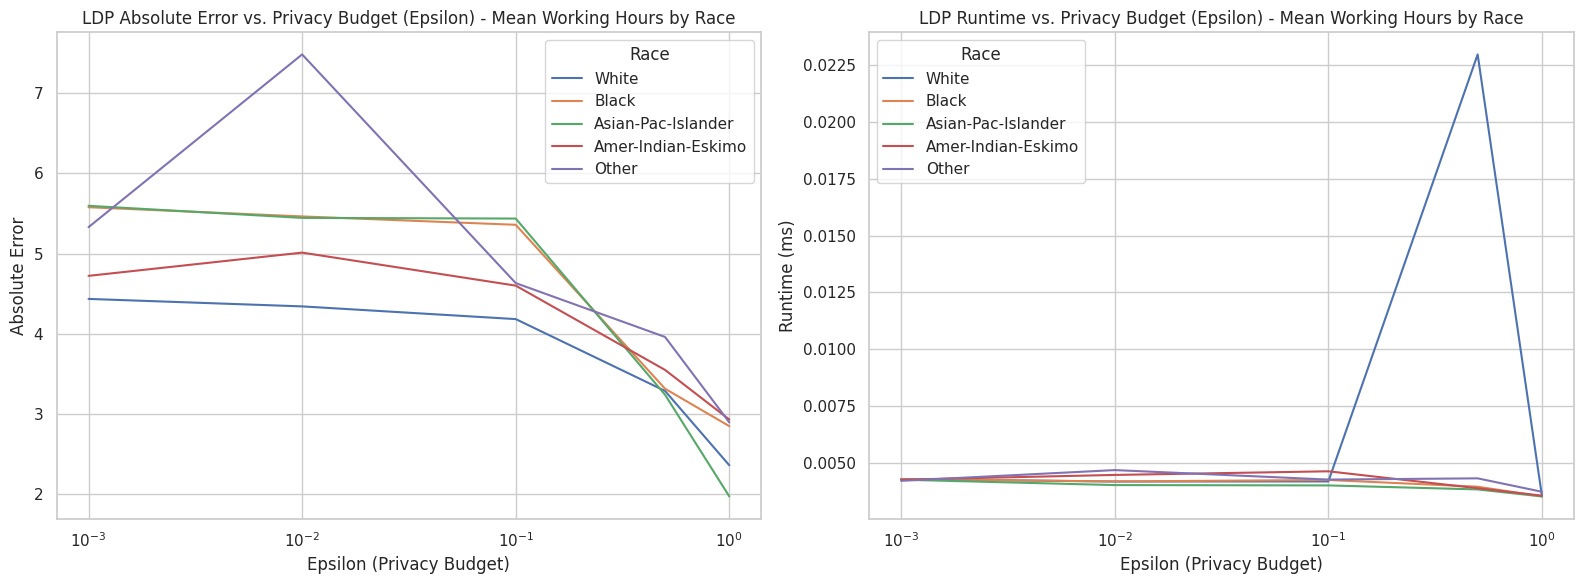

In [47]:
# Create a combined DataFrame for easier analysis
combined_df = pd.concat([filtered_X, filtered_y], axis=1)

# Define epsilon values for Local Differential Privacy
epsilon_values_ldp = [0.001, 0.01, 0.1, 0.5, 1.0]

# Randomized Response mechanism for Local Differential Privacy
def randomized_response(value, epsilon, domain=[0, 100]):  # Assuming working hours range between 0 and 100
    """
    Implements randomized response for Local Differential Privacy.

    Args:
        value: True working hours value
        epsilon: Privacy parameter
        domain: Possible working hours values (min, max)

    Returns:
        Privatized working hours value
    """
    # Calculate probability of keeping true value
    p = np.exp(epsilon) / (1 + np.exp(epsilon))

    # With probability p, keep the true value
    # With probability 1-p, sample uniformly from the domain
    if np.random.random() < p:
        return value
    else:
        return np.random.randint(domain[0], domain[1] + 1)

# Function to measure runtime
def measure_ldp_runtime(func, value, epsilon, domain, num_iterations=1000):
    start_time = time.time()
    for _ in range(num_iterations):
        func(value, epsilon, domain)
    end_time = time.time()
    return ((end_time - start_time) / num_iterations) * 1000  # ms

# Calculate results for LDP
ldp_results = []
np.random.seed(42)  # Set seed for reproducibility
races = combined_df['race'].unique()

for race in races:
    subset = combined_df[combined_df['race'] == race]

    for epsilon in epsilon_values_ldp:
        # Measure average runtime
        sample_hours = 40  # Arbitrary sample hours for runtime measurement
        runtime = measure_ldp_runtime(randomized_response, sample_hours, epsilon, [0, 100])

        # Apply randomized response to each individual's working hours
        privatized_hours = [randomized_response(hours, epsilon, [0, 100]) for hours in subset['hours-per-week']]

        # Calculate mean of privatized working hours
        ldp_mean_hours = np.mean(privatized_hours)

        # Calculate true mean working hours for comparison
        true_mean_hours = subset['hours-per-week'].mean()

        # Calculate error metrics
        abs_error = abs(true_mean_hours - ldp_mean_hours)

        ldp_results.append({
            'Race': race,
            'Epsilon': epsilon,
            'True Mean Hours': true_mean_hours,
            'LDP Mean Hours': ldp_mean_hours,
            'Absolute Error': abs_error,
            'Runtime (ms)': round(runtime, 6)
        })

ldp_results_df = pd.DataFrame(ldp_results)

# Create a figure with two subplots
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Plot 1: Absolute Error - Line plot with markers
sns.lineplot(x='Epsilon', y='Absolute Error', hue='Race',
             markers=True, dashes=False, data=ldp_results_df, ax=axes[0])
axes[0].set_title('LDP Absolute Error vs. Privacy Budget (Epsilon) - Mean Working Hours by Race')
axes[0].set_xlabel('Epsilon (Privacy Budget)')
axes[0].set_ylabel('Absolute Error')
axes[0].set_xscale('log')

# Plot 2: Runtime - Line plot with markers
sns.lineplot(x='Epsilon', y='Runtime (ms)', hue='Race',
             markers=True, dashes=False, data=ldp_results_df, ax=axes[1])
axes[1].set_title('LDP Runtime vs. Privacy Budget (Epsilon) - Mean Working Hours by Race')
axes[1].set_xlabel('Epsilon (Privacy Budget)')
axes[1].set_ylabel('Runtime (ms)')
axes[1].set_xscale('log')

plt.tight_layout()
plt.show()

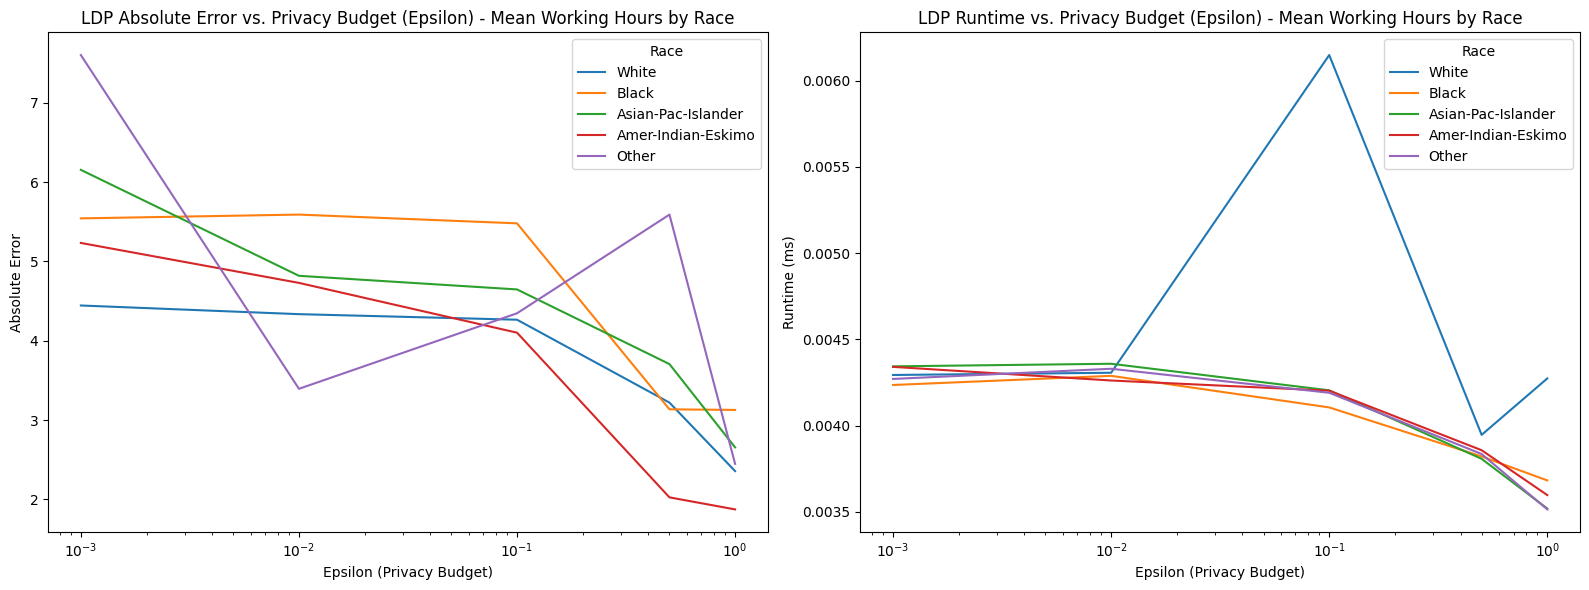

In [4]:
# Create a combined DataFrame for easier analysis
combined_df = pd.concat([filtered_X, filtered_y], axis=1)

# Define epsilon values for Local Differential Privacy
epsilon_values_ldp = [0.001, 0.01, 0.1, 0.5, 1.0]

# Randomized Response mechanism for Local Differential Privacy
def randomized_response(value, epsilon, domain=[1, 99]):  # actual working hours between 1 and 99
    """
    Implements randomized response for Local Differential Privacy.

    Args:
        value: True working hours value
        epsilon: Privacy parameter
        domain: Possible working hours values (min, max)

    Returns:
        Privatized working hours value
    """
    # Calculate probability of keeping true value
    p = np.exp(epsilon) / (1 + np.exp(epsilon))

    # With probability p, keep the true value
    # With probability 1-p, sample uniformly from the domain
    if np.random.random() < p:
        return value
    else:
        return np.random.randint(domain[0], domain[1] + 1)

# Function to measure runtime
def measure_ldp_runtime(func, value, epsilon, domain, num_iterations=1000):
    start_time = time.time()
    for _ in range(num_iterations):
        func(value, epsilon, domain)
    end_time = time.time()
    return ((end_time - start_time) / num_iterations) * 1000  # ms

# Calculate results for LDP
ldp_results = []
np.random.seed(42)  # Set seed for reproducibility
races = combined_df['race'].unique()

for race in races:
    subset = combined_df[combined_df['race'] == race]

    for epsilon in epsilon_values_ldp:
        # Measure average runtime
        sample_hours = 40  # Arbitrary sample hours for runtime measurement
        runtime = measure_ldp_runtime(randomized_response, sample_hours, epsilon, [1, 99])

        # Apply randomized response to each individual's working hours
        privatized_hours = [randomized_response(hours, epsilon, [1, 99]) for hours in subset['hours-per-week']]

        # Calculate mean of privatized working hours
        ldp_mean_hours = np.mean(privatized_hours)

        # Calculate true mean working hours for comparison
        true_mean_hours = subset['hours-per-week'].mean()

        # Calculate error metrics
        abs_error = abs(true_mean_hours - ldp_mean_hours)

        ldp_results.append({
            'Race': race,
            'Epsilon': epsilon,
            'True Mean Hours': true_mean_hours,
            'LDP Mean Hours': ldp_mean_hours,
            'Absolute Error': abs_error,
            'Runtime (ms)': round(runtime, 6)
        })

ldp_results_df = pd.DataFrame(ldp_results)

# Create a figure with two subplots
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Plot 1: Absolute Error - Line plot with markers
sns.lineplot(x='Epsilon', y='Absolute Error', hue='Race',
             markers=True, dashes=False, data=ldp_results_df, ax=axes[0])
axes[0].set_title('LDP Absolute Error vs. Privacy Budget (Epsilon) - Mean Working Hours by Race')
axes[0].set_xlabel('Epsilon (Privacy Budget)')
axes[0].set_ylabel('Absolute Error')
axes[0].set_xscale('log')

# Plot 2: Runtime - Line plot with markers
sns.lineplot(x='Epsilon', y='Runtime (ms)', hue='Race',
             markers=True, dashes=False, data=ldp_results_df, ax=axes[1])
axes[1].set_title('LDP Runtime vs. Privacy Budget (Epsilon) - Mean Working Hours by Race')
axes[1].set_xlabel('Epsilon (Privacy Budget)')
axes[1].set_ylabel('Runtime (ms)')
axes[1].set_xscale('log')

plt.tight_layout()
plt.show()

In [46]:
ldp_results_df

,Race,Epsilon,True Mean Hours,LDP Mean Hours,Absolute Error,Runtime (ms)
0,White,0.001,41.191065,45.693520,4.502455,0.091569
1,White,0.010,41.191065,45.621186,4.430121,0.004317
2,White,0.100,41.191065,45.483536,4.292471,0.004239
3,White,0.500,41.191065,44.539984,3.348919,0.004008
4,White,1.000,41.191065,43.376603,2.185538,0.003628
5,Black,0.001,38.910833,44.609272,5.698439,0.006557
6,Black,0.010,38.910833,44.021050,5.110218,0.006033
7,Black,0.100,38.910833,44.096500,5.185667,0.007015
8,Black,0.500,38.910833,43.133869,4.223037,0.004966
9,Black,1.000,38.910833,41.885762,2.974929,0.003899


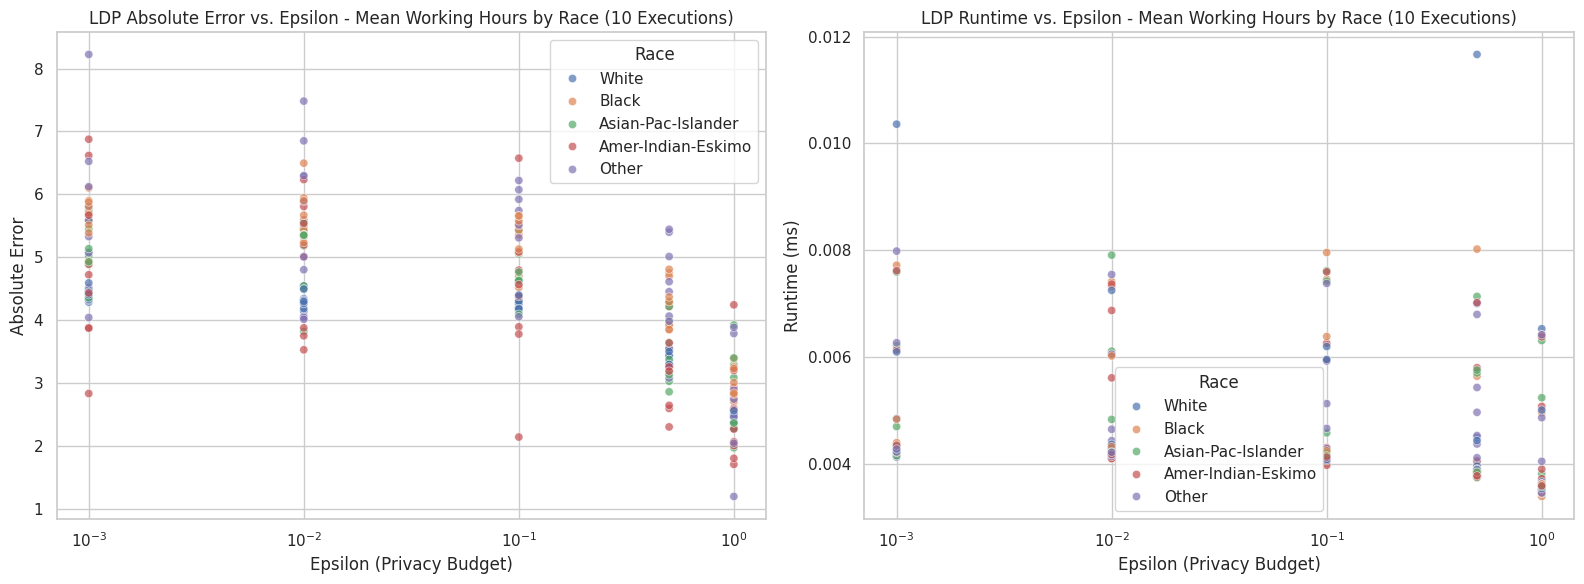

In [48]:
#for 10 executions
# Create a combined DataFrame for easier analysis
combined_df = pd.concat([filtered_X, filtered_y], axis=1)

# Define epsilon values for Local Differential Privacy
epsilon_values_ldp = [0.001, 0.01, 0.1, 0.5, 1.0]

# Randomized Response mechanism for Local Differential Privacy
def randomized_response(value, epsilon, domain=[0, 100]):  # working hours between 1 and 99
    """
    Implements randomized response for Local Differential Privacy.

    Args:
        value: True working hours value
        epsilon: Privacy parameter
        domain: Possible working hours values (min, max)

    Returns:
        Privatized working hours value
    """
    # Calculate probability of keeping true value
    p = np.exp(epsilon) / (1 + np.exp(epsilon))

    # With probability p, keep the true value
    # With probability 1-p, sample uniformly from the domain
    if np.random.random() < p:
        return value
    else:
        return np.random.randint(domain[0], domain[1] + 1)

# Function to measure runtime
def measure_ldp_runtime(func, value, epsilon, domain, num_iterations=1000):
    start_time = time.time()
    for _ in range(num_iterations):
        func(value, epsilon, domain)
    end_time = time.time()
    return ((end_time - start_time) / num_iterations) * 1000  # ms

# Calculate results for LDP with multiple executions
num_executions = 10
all_results = []  # List to store results from all executions

races = combined_df['race'].unique()

for execution in range(num_executions):
    np.random.seed(42 + execution)  # Different seed for each execution
    results = []  # Results for this execution

    for race in races:
        subset = combined_df[combined_df['race'] == race]

        for epsilon in epsilon_values_ldp:
            # Measure average runtime
            sample_hours = 40  # Arbitrary sample hours for runtime measurement
            runtime = measure_ldp_runtime(randomized_response, sample_hours, epsilon, [0, 100])

            # Apply randomized response to each individual's working hours
            privatized_hours = [randomized_response(hours, epsilon, [0, 100]) for hours in subset['hours-per-week']]

            # Calculate mean of privatized working hours
            ldp_mean_hours = np.mean(privatized_hours)

            # Calculate true mean working hours for comparison
            true_mean_hours = subset['hours-per-week'].mean()

            # Calculate error metrics
            abs_error = abs(true_mean_hours - ldp_mean_hours)

            results.append({
                'Race': race,
                'Epsilon': epsilon,
                'Execution': execution + 1,  # Add execution number
                'True Mean Hours': true_mean_hours,
                'LDP Mean Hours': ldp_mean_hours,
                'Absolute Error': abs_error,
                'Runtime (ms)': round(runtime, 6)
            })

    all_results.extend(results)  # Add results from this execution to the main list

ldp_results_df = pd.DataFrame(all_results)  # Create DataFrame from all results

# Create a figure with two subplots
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Plot 1: Absolute Error
sns.scatterplot(x='Epsilon', y='Absolute Error', hue='Race',
             marker='o', style='Race', palette='plasma',
             data=results_df, ax=axes[0])
axes[0].set_title('Absolute Error vs. Epsilon - Mean Working Hours by Race (10 Executions)', fontsize=14)
axes[0].set_xlabel('Epsilon (Privacy Budget)', fontsize=12)
axes[0].set_ylabel('Absolute Error', fontsize=12)
axes[0].set_xscale('log')
axes[0].legend(title='Race', fontsize=10)
axes[0].grid(True, linestyle='--', alpha=0.7)  # Add gridlines

# Plot 2: Runtime
sns.scatterplot(x='Epsilon', y='Runtime (ms)', hue='Race',
             marker='o', style='Race', palette='plasma',
             data=results_df, ax=axes[1]) # Remove units='Execution'
axes[1].set_title('Runtime vs. Epsilon - Mean Working Hours by Race (10 Executions)', fontsize=14)
axes[1].set_xlabel('Epsilon (Privacy Budget)', fontsize=12)
axes[1].set_ylabel('Runtime (ms)', fontsize=12)
axes[1].set_xscale('log')
axes[1].legend(title='Race', fontsize=10)
axes[1].grid(True, linestyle='--', alpha=0.7) # Add gridlines

plt.tight_layout()
plt.show() # Added plt.show() to display the plot

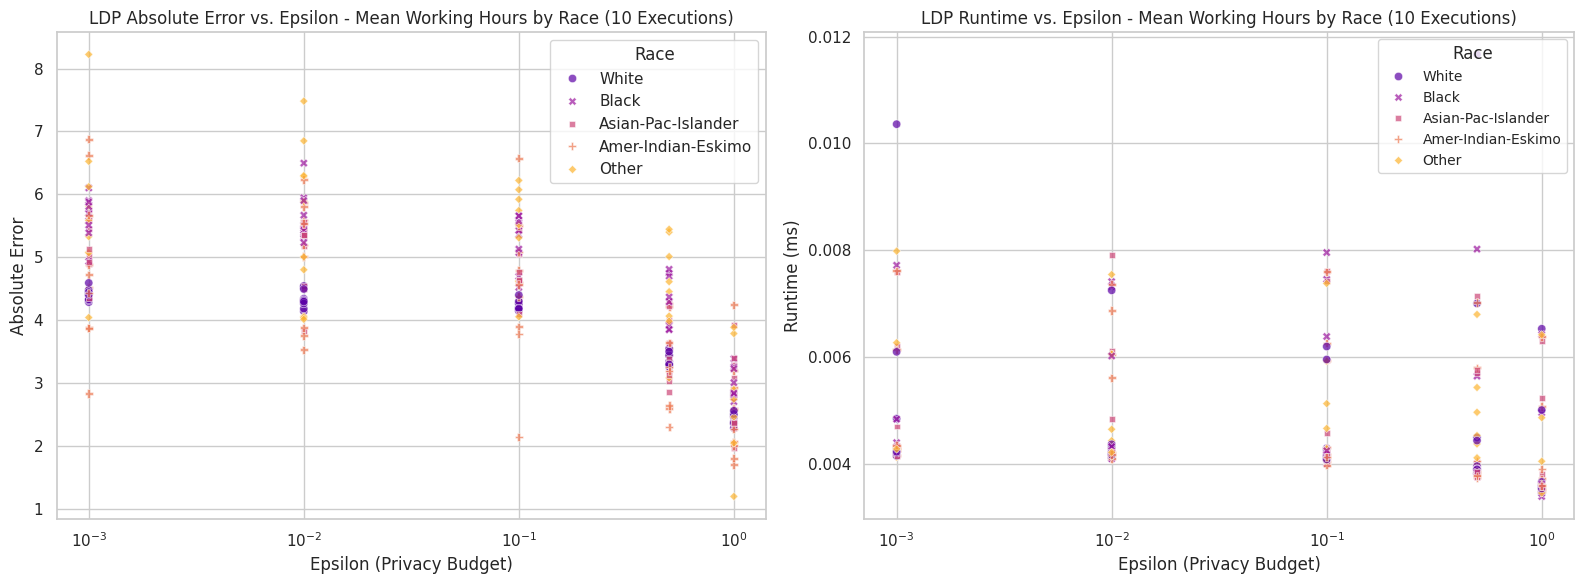

In [53]:
# better viual plot
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Plot 1: Absolute Error with spread (using scatterplot)
sns.scatterplot(x='Epsilon', y='Absolute Error', hue='Race', palette='plasma',
                marker='o', style='Race', data=ldp_results_df, ax=axes[0], alpha=0.7)  # Use alpha for transparency
axes[0].set_title('LDP Absolute Error vs. Epsilon - Mean Working Hours by Race (10 Executions)')
axes[0].set_xlabel('Epsilon (Privacy Budget)')
axes[0].set_ylabel('Absolute Error')
axes[0].set_xscale('log')

# Plot 2: Runtime with spread (using scatterplot)
sns.scatterplot(x='Epsilon', y='Runtime (ms)', hue='Race', palette='plasma',
                marker='o', style='Race', data=ldp_results_df, ax=axes[1], alpha=0.7)
axes[1].set_title('LDP Runtime vs. Epsilon - Mean Working Hours by Race (10 Executions)')
axes[1].set_xlabel('Epsilon (Privacy Budget)')
axes[1].set_ylabel('Runtime (ms)')
axes[1].set_xscale('log')
axes[1].legend(title='Race', fontsize=10, loc='upper right')

plt.tight_layout()
plt.show()

## Mean Age Query

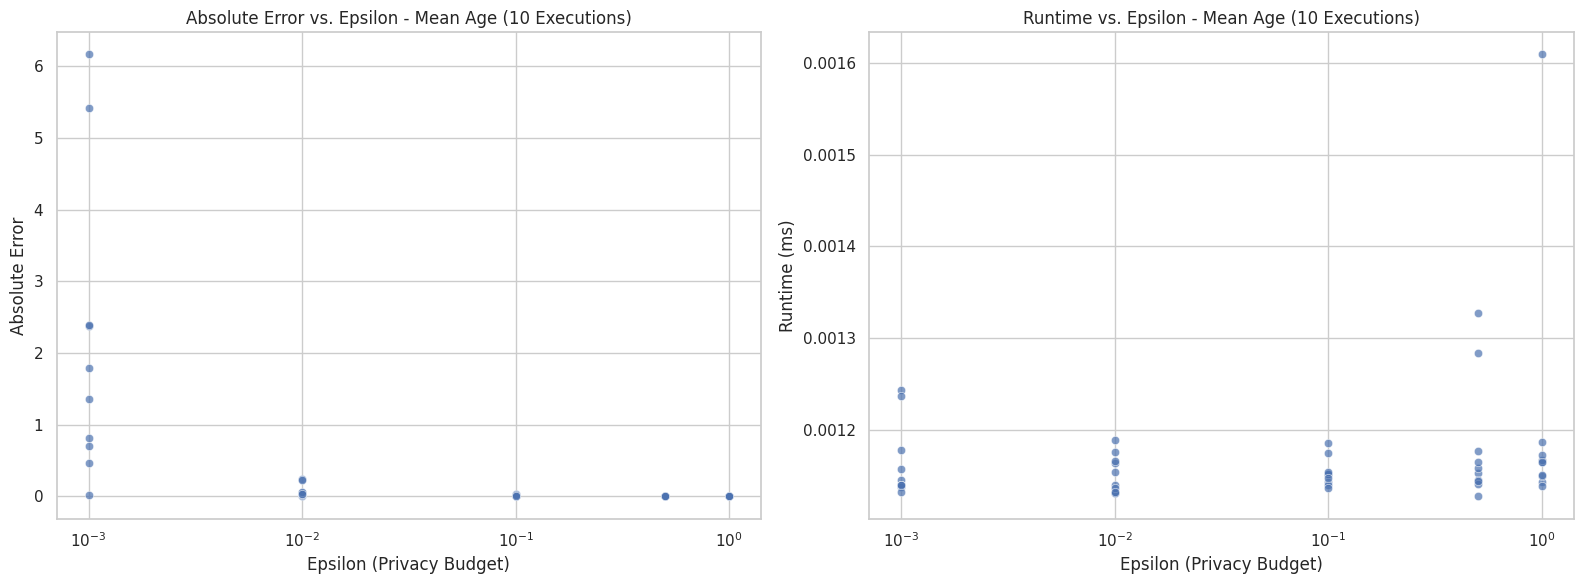

In [56]:
#For 10 exections
# Create a combined DataFrame for easier analysis
combined_df = pd.concat([filtered_X, filtered_y], axis=1)

# Define privacy budgets (adjusted to match your request)
epsilon_values = [0.001, 0.01, 0.1, 0.5, 1.0]

# Laplace mechanism for differential privacy
def laplace_mechanism(value, epsilon, sensitivity):
    scale = sensitivity / epsilon
    noise = np.random.laplace(0, scale)
    return value + noise

# Measure runtime
def measure_runtime(func, value, epsilon, sensitivity, num_iterations=1000):
    start_time = time.time()
    for _ in range(num_iterations):
        func(value, epsilon, sensitivity)
    end_time = time.time()
    return ((end_time - start_time) / num_iterations) * 1000  # ms

# Calculate results with multiple executions
num_executions = 10
results = []

# Sensitivity for mean age (assuming age range is 0-100)
sensitivity = (combined_df['age'].max() - combined_df['age'].min()) / len(combined_df)

# Store true mean age for each education level
true_mean_age = combined_df['age'].mean()

for i in range(num_executions):
    np.random.seed(42 + i)  # Different seed for each execution

    for epsilon in epsilon_values:
        # Apply Laplace mechanism
        dp_mean_age = laplace_mechanism(true_mean_age, epsilon, sensitivity)

        # Measure runtime
        runtime = measure_runtime(laplace_mechanism, true_mean_age, epsilon, sensitivity)

        # Calculate absolute error using stored true_mean_age
        abs_error = abs(true_mean_age - dp_mean_age)

        results.append({
            'Epsilon': epsilon,
            'Execution': i + 1,  # Add execution number
            'True Mean Age': true_mean_age,  # Access stored true mean age
            'DP Mean Age': dp_mean_age,
            'Absolute Error': abs_error,
            'Runtime (ms)': round(runtime, 6)
        })

results_df = pd.DataFrame(results)

# Create a figure with two subplots
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Plot 1: Absolute Error with spread (using scatterplot)
sns.scatterplot(x='Epsilon', y='Absolute Error',
                data=results_df, ax=axes[0], alpha=0.7)  # Use alpha for transparency
axes[0].set_title('Absolute Error vs. Epsilon - Mean Age (10 Executions)')
axes[0].set_xlabel('Epsilon (Privacy Budget)')
axes[0].set_ylabel('Absolute Error')
axes[0].set_xscale('log')

# Plot 2: Runtime with spread (using scatterplot)
sns.scatterplot(x='Epsilon', y='Runtime (ms)',
                data=results_df, ax=axes[1], alpha=0.7)
axes[1].set_title('Runtime vs. Epsilon - Mean Age (10 Executions)')
axes[1].set_xlabel('Epsilon (Privacy Budget)')
axes[1].set_ylabel('Runtime (ms)')
axes[1].set_xscale('log')

plt.tight_layout()
plt.show()

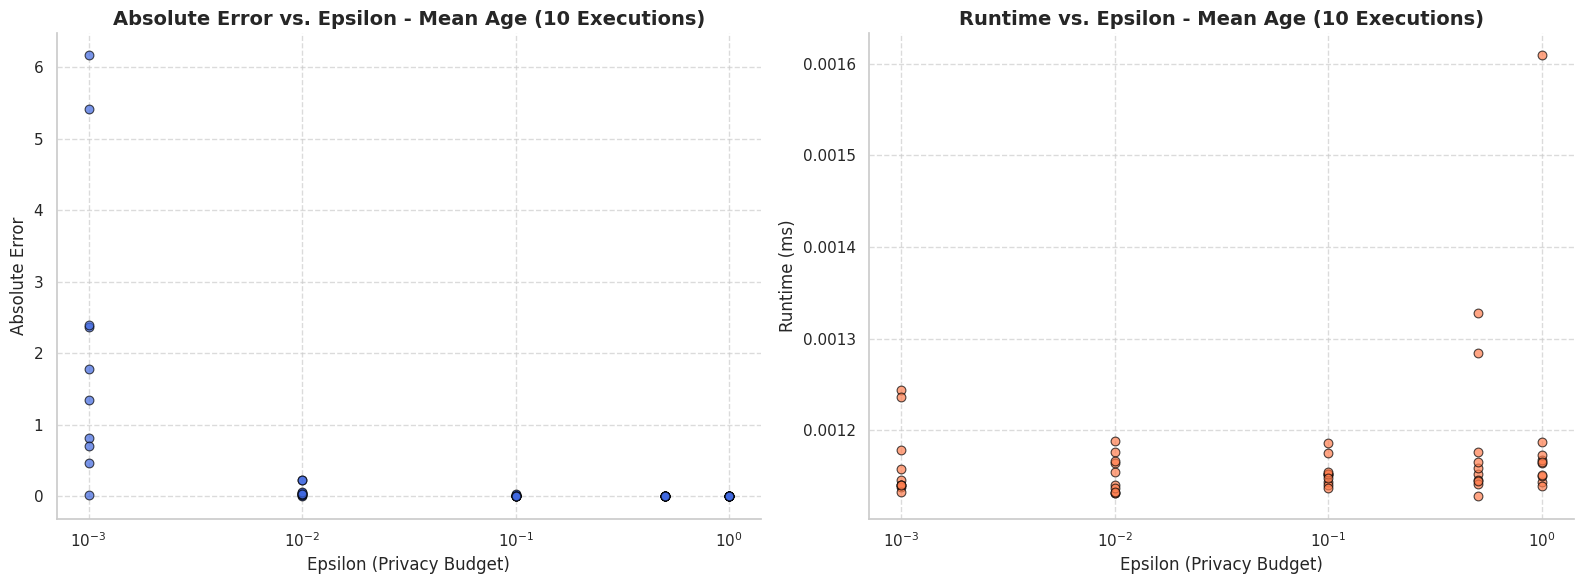

In [59]:
# Better visual plot
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# --- Plot 1: Absolute Error ---
sns.scatterplot(x='Epsilon', y='Absolute Error', data=results_df,
                ax=axes[0], alpha=0.7, color='royalblue', s=40,  # Color, transparency, marker size
                edgecolor='black', linewidth=0.8)  # Add edge color for markers
axes[0].set_title('Absolute Error vs. Epsilon - Mean Age (10 Executions)', fontsize=14, fontweight='bold')
axes[0].set_xlabel('Epsilon (Privacy Budget)', fontsize=12)
axes[0].set_ylabel('Absolute Error', fontsize=12)
axes[0].set_xscale('log')
axes[0].grid(True, linestyle='--', alpha=0.7)  # Add a subtle grid
axes[0].spines['top'].set_visible(False)  # Remove top and right spines
axes[0].spines['right'].set_visible(False)

# --- Plot 2: Runtime ---
sns.scatterplot(x='Epsilon', y='Runtime (ms)', data=results_df,
                ax=axes[1], alpha=0.7, color='coral', s=40,
                edgecolor='black', linewidth=0.8)
axes[1].set_title('Runtime vs. Epsilon - Mean Age (10 Executions)', fontsize=14, fontweight='bold')
axes[1].set_xlabel('Epsilon (Privacy Budget)', fontsize=12)
axes[1].set_ylabel('Runtime (ms)', fontsize=12)
axes[1].set_xscale('log')
axes[1].grid(True, linestyle='--', alpha=0.7)
axes[1].spines['top'].set_visible(False)
axes[1].spines['right'].set_visible(False)

plt.tight_layout()
plt.show()

## LDP mean age Query

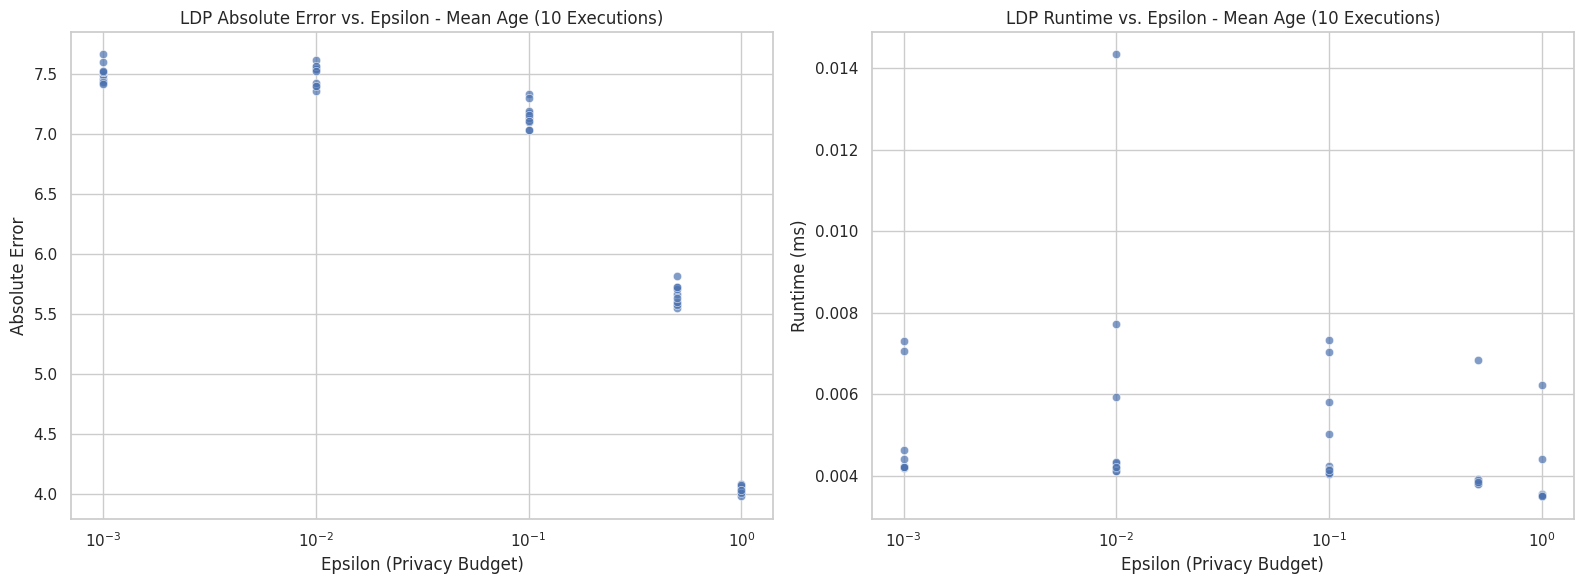

In [54]:

# Create a combined DataFrame for easier analysis
combined_df = pd.concat([filtered_X, filtered_y], axis=1)

# Define epsilon values for Local Differential Privacy
epsilon_values_ldp = [0.001, 0.01, 0.1, 0.5, 1.0]

# Randomized Response mechanism for Local Differential Privacy (for age)
def randomized_response_age(value, epsilon, domain=[17, 90]):  # age range
    """
    Implements randomized response for Local Differential Privacy.

    Args:
        value: True age value
        epsilon: Privacy parameter
        domain: Possible age values (min, max)

    Returns:
        Privatized age value
    """
    # Calculate probability of keeping true value
    p = np.exp(epsilon) / (1 + np.exp(epsilon))

    # With probability p, keep the true value
    # With probability 1-p, sample uniformly from the domain
    if np.random.random() < p:
        return value
    else:
        return np.random.randint(domain[0], domain[1] + 1)

# Function to measure runtime
def measure_ldp_runtime(func, value, epsilon, domain, num_iterations=1000):
    start_time = time.time()
    for _ in range(num_iterations):
        func(value, epsilon, domain)
    end_time = time.time()
    return ((end_time - start_time) / num_iterations) * 1000  # ms

# Calculate results for LDP with multiple executions
num_executions = 10
all_results = []  # List to store results from all executions

for execution in range(num_executions):
    np.random.seed(42 + execution)  # Different seed for each execution
    results = []  # Results for this execution

    for epsilon in epsilon_values_ldp:
        # Measure average runtime
        sample_age = 40  # Arbitrary sample age for runtime measurement
        runtime = measure_ldp_runtime(randomized_response_age, sample_age, epsilon, [17, 90])

        # Apply randomized response to each individual's age
        privatized_ages = [randomized_response_age(age, epsilon, [17, 90]) for age in combined_df['age']]

        # Calculate mean of privatized ages
        ldp_mean_age = np.mean(privatized_ages)

        # Calculate true mean age for comparison
        true_mean_age = combined_df['age'].mean()

        # Calculate error metrics
        abs_error = abs(true_mean_age - ldp_mean_age)

        results.append({
            'Epsilon': epsilon,
            'Execution': execution + 1,  # Add execution number
            'True Mean Age': true_mean_age,
            'LDP Mean Age': ldp_mean_age,
            'Absolute Error': abs_error,
            'Runtime (ms)': round(runtime, 6)
        })

    all_results.extend(results)  # Add results from this execution to the main list

ldp_results_df = pd.DataFrame(all_results)  # Create DataFrame from all results

# Create a figure with two subplots
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Plot 1: Absolute Error with spread (using scatterplot)
sns.scatterplot(x='Epsilon', y='Absolute Error',
                data=ldp_results_df, ax=axes[0], alpha=0.7)  # Use alpha for transparency
axes[0].set_title('LDP Absolute Error vs. Epsilon - Mean Age (10 Executions)')
axes[0].set_xlabel('Epsilon (Privacy Budget)')
axes[0].set_ylabel('Absolute Error')
axes[0].set_xscale('log')

# Plot 2: Runtime with spread (using scatterplot)
sns.scatterplot(x='Epsilon', y='Runtime (ms)',
                data=ldp_results_df, ax=axes[1], alpha=0.7)
axes[1].set_title('LDP Runtime vs. Epsilon - Mean Age (10 Executions)')
axes[1].set_xlabel('Epsilon (Privacy Budget)')
axes[1].set_ylabel('Runtime (ms)')
axes[1].set_xscale('log')

plt.tight_layout()
plt.show()

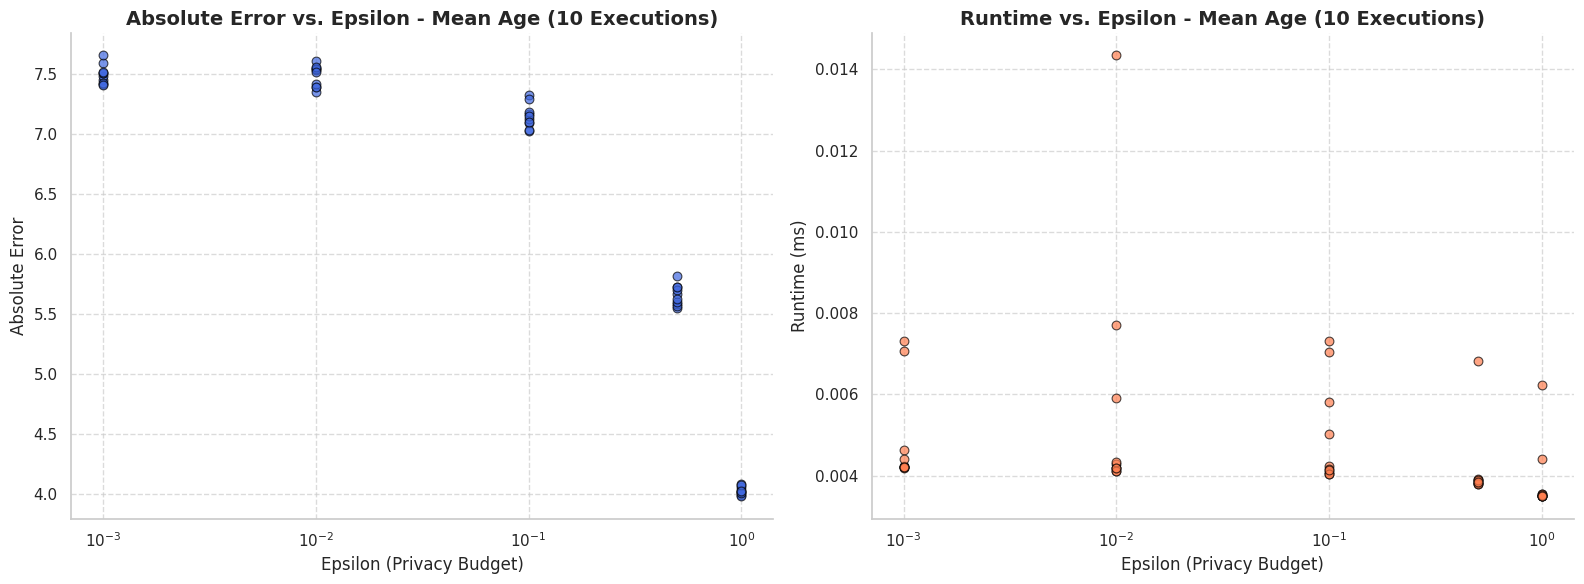

In [61]:
# Better visual
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# --- Plot 1: Absolute Error ---
sns.scatterplot(x='Epsilon', y='Absolute Error', data=ldp_results_df,
                ax=axes[0], alpha=0.7, color='royalblue', s=40,  # Color, transparency, marker size
                edgecolor='black', linewidth=0.8)  # Add edge color for markers
axes[0].set_title('Absolute Error vs. Epsilon - Mean Age (10 Executions)', fontsize=14, fontweight='bold')
axes[0].set_xlabel('Epsilon (Privacy Budget)', fontsize=12)
axes[0].set_ylabel('Absolute Error', fontsize=12)
axes[0].set_xscale('log')
axes[0].grid(True, linestyle='--', alpha=0.7)  # Add a subtle grid
axes[0].spines['top'].set_visible(False)  # Remove top and right spines
axes[0].spines['right'].set_visible(False)

# --- Plot 2: Runtime ---
sns.scatterplot(x='Epsilon', y='Runtime (ms)', data=ldp_results_df,
                ax=axes[1], alpha=0.7, color='coral', s=40,
                edgecolor='black', linewidth=0.8)
axes[1].set_title('Runtime vs. Epsilon - Mean Age (10 Executions)', fontsize=14, fontweight='bold')
axes[1].set_xlabel('Epsilon (Privacy Budget)', fontsize=12)
axes[1].set_ylabel('Runtime (ms)', fontsize=12)
axes[1].set_xscale('log')
axes[1].grid(True, linestyle='--', alpha=0.7)
axes[1].spines['top'].set_visible(False)
axes[1].spines['right'].set_visible(False)

plt.tight_layout()
plt.show()

In [63]:
ldp_results_df

,Epsilon,Execution,True Mean Age,LDP Mean Age,Absolute Error,Runtime (ms)
0,0.001,1,38.547941,46.001725,7.453784,0.004637
1,0.010,1,38.547941,45.942329,7.394388,0.014343
2,0.100,1,38.547941,45.646234,7.098293,0.007037
3,0.500,1,38.547941,44.094644,5.546703,0.006833
4,1.000,1,38.547941,42.542103,3.994162,0.006221
5,0.001,2,38.547941,46.033634,7.485693,0.007312
6,0.010,2,38.547941,45.904471,7.356530,0.007718
7,0.100,2,38.547941,45.680178,7.132237,0.007326
8,0.500,2,38.547941,44.128588,5.580647,0.003892
9,1.000,2,38.547941,42.566516,4.018575,0.004408


## Mean Working Hours

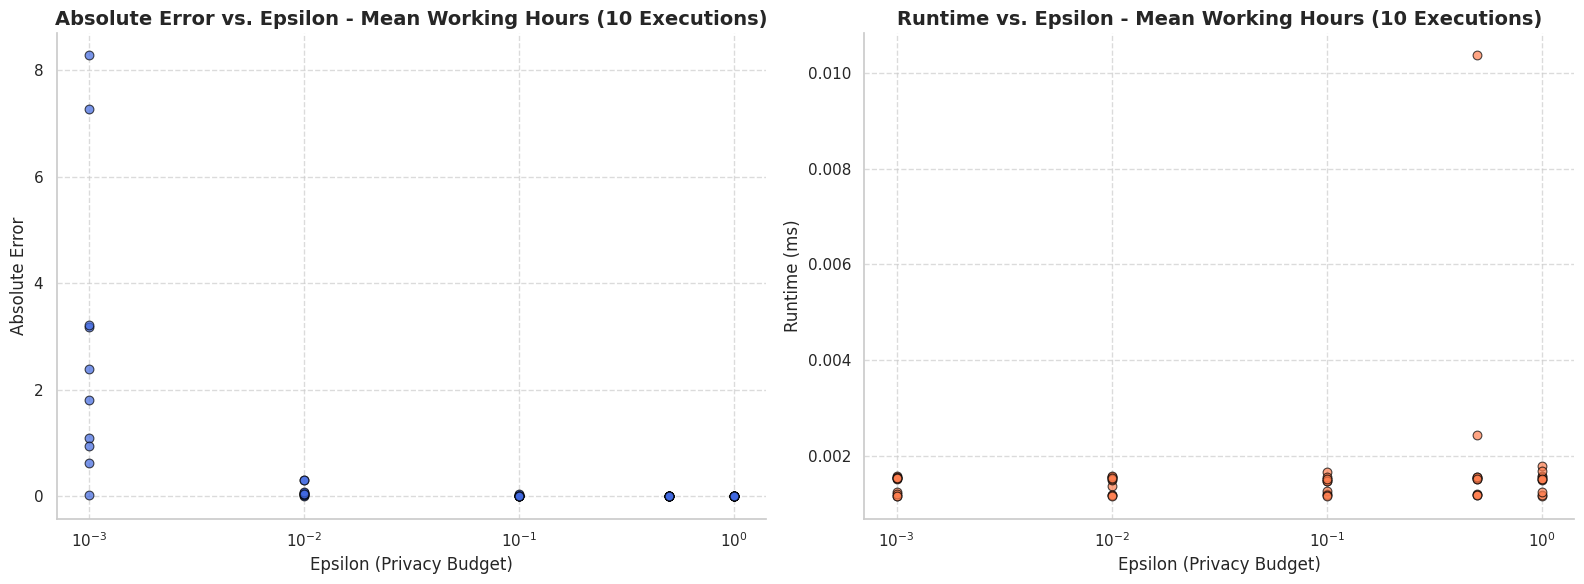

In [64]:

# Create a combined DataFrame for easier analysis
combined_df = pd.concat([filtered_X, filtered_y], axis=1)

# Define privacy budgets
epsilon_values = [0.001, 0.01, 0.1, 0.5, 1]

# Laplace mechanism for differential privacy
def laplace_mechanism(value, epsilon, sensitivity):
    scale = sensitivity / epsilon
    noise = np.random.laplace(0, scale)
    return value + noise  # Now returns the noisy value directly

# Measure runtime
def measure_runtime(func, value, epsilon, num_iterations=1000):
    start_time = time.time()
    for _ in range(num_iterations):
        func(value, epsilon, sensitivity)
    end_time = time.time()
    return ((end_time - start_time) / num_iterations) * 1000  # ms

# Calculate results for 10 executions
num_executions = 10
all_results = []  # List to store results from all executions


# Sensitivity for mean working hours (assuming range 0-100)
sensitivity = (combined_df['hours-per-week'].max() - combined_df['hours-per-week'].min()) / len(combined_df)

# Store true mean hr
true_mean_hour = combined_df['hours-per-week'].mean()

for execution in range(num_executions):
    np.random.seed(42 + execution)  # Different seed for each execution
    results = []  # Results for this execution

    for epsilon in epsilon_values:
        dp_mean_hour = laplace_mechanism(true_mean_hour, epsilon, sensitivity)
        runtime = measure_runtime(laplace_mechanism, true_mean_hour, epsilon)
        abs_error = abs(true_mean_hour - dp_mean_hour)

        results.append({
            'Epsilon': epsilon,
            'Execution': execution + 1,  # Add execution number
            'True Mean Hour': true_mean_hour,
            'DP Mean Hour': dp_mean_hour,
            'Absolute Error': abs_error,
            'Runtime (ms)': round(runtime, 6)
        })

    all_results.extend(results)  # Add results from this execution to the main list

results_df = pd.DataFrame(all_results)  # Create DataFrame from all results

# Create a figure with two subplots
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# --- Plot 1: Absolute Error ---
sns.scatterplot(x='Epsilon', y='Absolute Error', data=results_df,
                ax=axes[0], alpha=0.7, color='royalblue', s=40,  # Color, transparency, marker size
                edgecolor='black', linewidth=0.8)  # Add edge color for markers
axes[0].set_title('Absolute Error vs. Epsilon - Mean Working Hours (10 Executions)', fontsize=14, fontweight='bold')
axes[0].set_xlabel('Epsilon (Privacy Budget)', fontsize=12)
axes[0].set_ylabel('Absolute Error', fontsize=12)
axes[0].set_xscale('log')
axes[0].grid(True, linestyle='--', alpha=0.7)  # Add a subtle grid
axes[0].spines['top'].set_visible(False)  # Remove top and right spines
axes[0].spines['right'].set_visible(False)

# --- Plot 2: Runtime ---
sns.scatterplot(x='Epsilon', y='Runtime (ms)', data=results_df,
                ax=axes[1], alpha=0.7, color='coral', s=40,
                edgecolor='black', linewidth=0.8)
axes[1].set_title('Runtime vs. Epsilon - Mean Working Hours (10 Executions)', fontsize=14, fontweight='bold')
axes[1].set_xlabel('Epsilon (Privacy Budget)', fontsize=12)
axes[1].set_ylabel('Runtime (ms)', fontsize=12)
axes[1].set_xscale('log')
axes[1].grid(True, linestyle='--', alpha=0.7)
axes[1].spines['top'].set_visible(False)
axes[1].spines['right'].set_visible(False)

plt.tight_layout()
plt.show()

In [65]:
results_df

,Epsilon,Execution,True Mean Hour,DP Mean Hour,Absolute Error,Runtime (ms)
0,0.001,1,40.938017,40.311926,0.626091,0.001231
1,0.010,1,40.938017,40.956984,0.018967,0.001176
2,0.100,1,40.938017,40.974294,0.036278,0.001188
3,0.500,1,40.938017,40.939262,0.001245,0.001193
4,1.000,1,40.938017,40.935397,0.002620,0.001161
5,0.001,2,40.938017,37.754129,3.183887,0.001145
6,0.010,2,40.938017,40.620697,0.317320,0.001366
7,0.100,2,40.938017,40.938863,0.000846,0.001255
8,0.500,2,40.938017,40.935532,0.002485,0.001182
9,1.000,2,40.938017,40.935091,0.002926,0.001184


## LDP Mean Working Hours

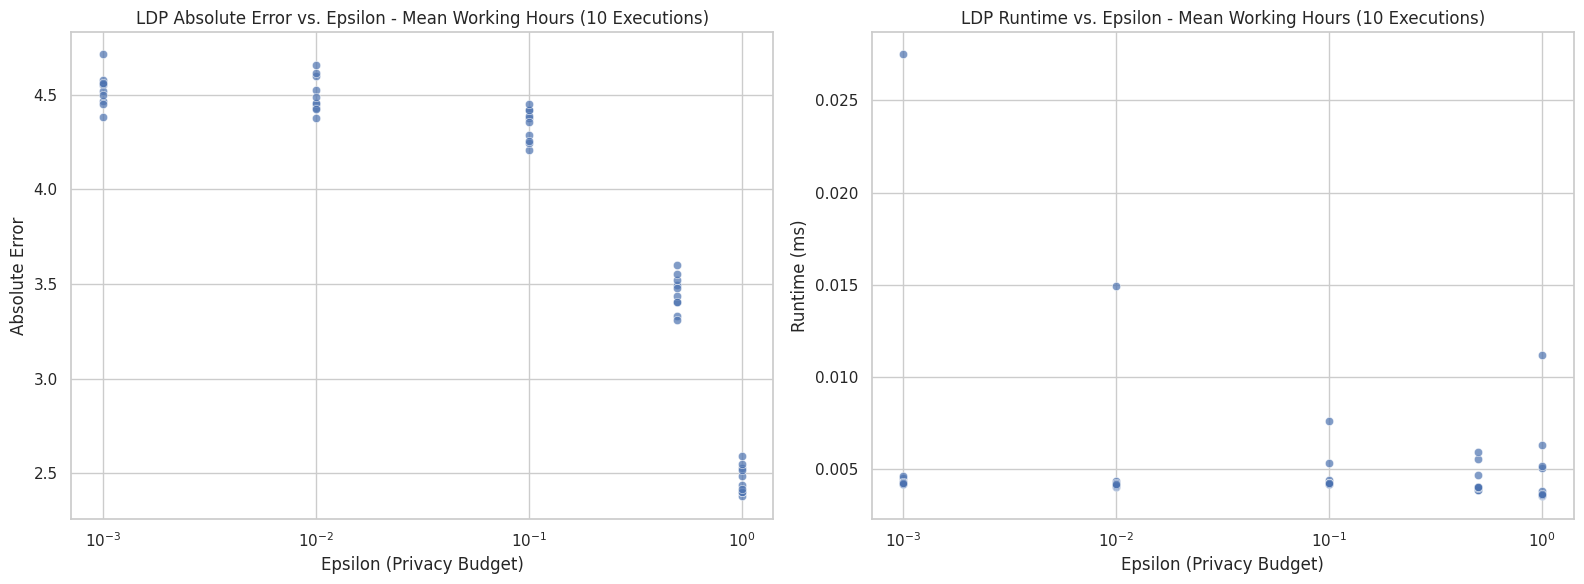

In [67]:

# Create a combined DataFrame for easier analysis
combined_df = pd.concat([filtered_X, filtered_y], axis=1)

# Define epsilon values for Local Differential Privacy
epsilon_values_ldp = [0.001, 0.01, 0.1, 0.5, 1.0]

# Randomized Response mechanism for Local Differential Privacy (for age)
def randomized_response_hour(value, epsilon, domain=[1, 99]):  # working hours range
    """
    Implements randomized response for Local Differential Privacy.

    Args:
        value: True age value
        epsilon: Privacy parameter
        domain: Possible age values (min, max)

    Returns:
        Privatized age value
    """
    # Calculate probability of keeping true value
    p = np.exp(epsilon) / (1 + np.exp(epsilon))

    # With probability p, keep the true value
    # With probability 1-p, sample uniformly from the domain
    if np.random.random() < p:
        return value
    else:
        return np.random.randint(domain[0], domain[1] + 1)

# Function to measure runtime
def measure_ldp_runtime(func, value, epsilon, domain, num_iterations=1000):
    start_time = time.time()
    for _ in range(num_iterations):
        func(value, epsilon, domain)
    end_time = time.time()
    return ((end_time - start_time) / num_iterations) * 1000  # ms

# Calculate results for LDP with multiple executions
num_executions = 10
all_results = []  # List to store results from all executions

for execution in range(num_executions):
    np.random.seed(42 + execution)  # Different seed for each execution
    results = []  # Results for this execution

    for epsilon in epsilon_values_ldp:
        # Measure average runtime
        sample_age = 40  # Arbitrary sample hours for runtime measurement
        runtime = measure_ldp_runtime(randomized_response_hour, sample_age, epsilon, [1, 99])

        # Apply randomized response to each hour
        privatized_hours = [randomized_response_hour(hour, epsilon, [1, 99]) for hour in combined_df['hours-per-week']]

        # Calculate mean of privatized ages
        ldp_mean_hour = np.mean(privatized_hours)

        # Calculate true mean age for comparison
        true_mean_hour = combined_df['hours-per-week'].mean()

        # Calculate error metrics
        abs_error = abs(true_mean_hour - ldp_mean_hour)

        results.append({
            'Epsilon': epsilon,
            'Execution': execution + 1,  # Add execution number
            'True Mean Hour': true_mean_hour,
            'LDP Mean Hour': ldp_mean_hour,
            'Absolute Error': abs_error,
            'Runtime (ms)': round(runtime, 6)
        })

    all_results.extend(results)  # Add results from this execution to the main list

ldp_results_df = pd.DataFrame(all_results)  # Create DataFrame from all results

# Create a figure with two subplots
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Plot 1: Absolute Error with spread (using scatterplot)
sns.scatterplot(x='Epsilon', y='Absolute Error',
                data=ldp_results_df, ax=axes[0], alpha=0.7)  # Use alpha for transparency
axes[0].set_title('LDP Absolute Error vs. Epsilon - Mean Working Hours (10 Executions)')
axes[0].set_xlabel('Epsilon (Privacy Budget)')
axes[0].set_ylabel('Absolute Error')
axes[0].set_xscale('log')

# Plot 2: Runtime with spread (using scatterplot)
sns.scatterplot(x='Epsilon', y='Runtime (ms)',
                data=ldp_results_df, ax=axes[1], alpha=0.7)
axes[1].set_title('LDP Runtime vs. Epsilon - Mean Working Hours (10 Executions)')
axes[1].set_xlabel('Epsilon (Privacy Budget)')
axes[1].set_ylabel('Runtime (ms)')
axes[1].set_xscale('log')

plt.tight_layout()
plt.show()

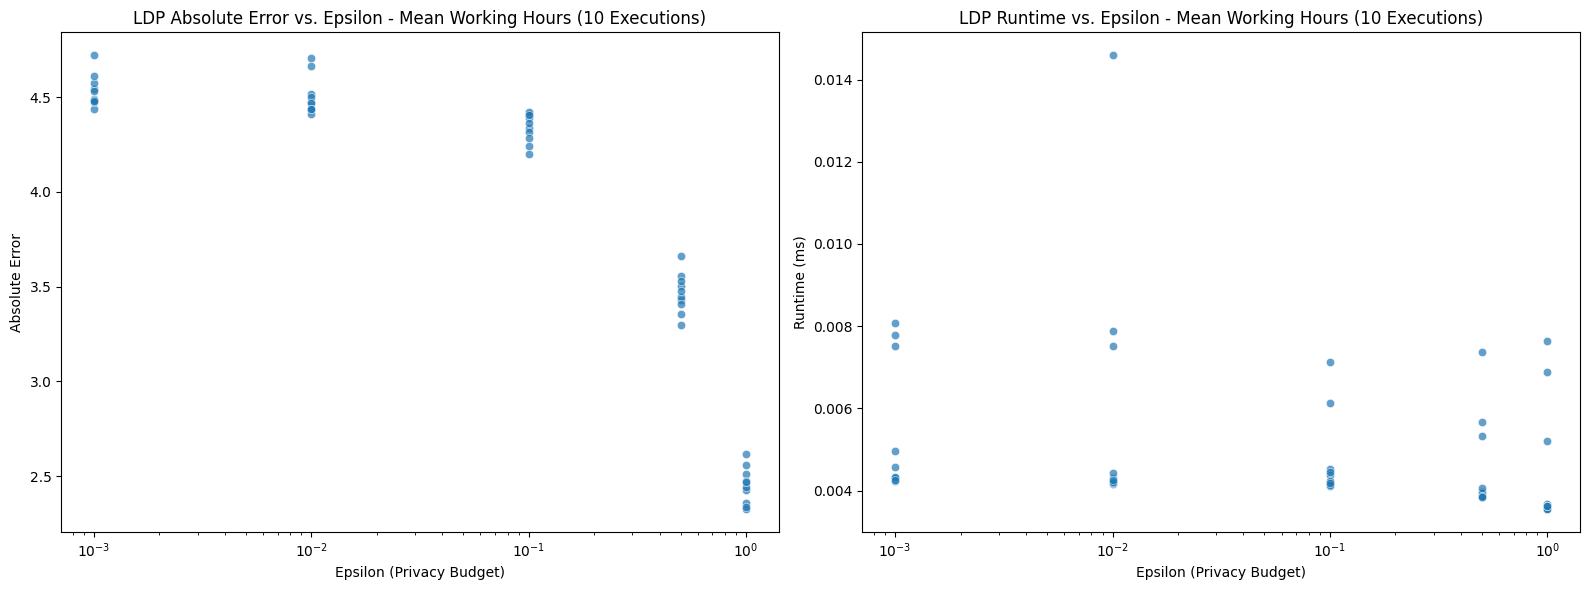

In [5]:

# Create a combined DataFrame for easier analysis
combined_df = pd.concat([filtered_X, filtered_y], axis=1)

# Define epsilon values for Local Differential Privacy
epsilon_values_ldp = [0.001, 0.01, 0.1, 0.5, 1.0]

# Randomized Response mechanism for Local Differential Privacy (for age)
def randomized_response_hour(value, epsilon, domain=[1, 99]):
    """
    Implements randomized response for Local Differential Privacy.

    Args:
        value: True age value
        epsilon: Privacy parameter
        domain: Possible age values (min, max)

    Returns:
        Privatized age value
    """
    # Calculate probability of keeping true value
    p = np.exp(epsilon) / (1 + np.exp(epsilon))

    # With probability p, keep the true value
    # With probability 1-p, sample uniformly from the domain
    if np.random.random() < p:
        return value
    else:
        return np.random.randint(domain[0], domain[1] + 1)

# Function to measure runtime
def measure_ldp_runtime(func, value, epsilon, domain, num_iterations=1000):
    start_time = time.time()
    for _ in range(num_iterations):
        func(value, epsilon, domain)
    end_time = time.time()
    return ((end_time - start_time) / num_iterations) * 1000  # ms

# Calculate results for LDP with multiple executions
num_executions = 10
all_results = []  # List to store results from all executions

for execution in range(num_executions):
    np.random.seed(42 + execution)  # Different seed for each execution
    results = []  # Results for this execution

    for epsilon in epsilon_values_ldp:
        # Measure average runtime
        sample_age = 40  # Arbitrary sample hours for runtime measurement
        runtime = measure_ldp_runtime(randomized_response_hour, sample_age, epsilon, [1, 99])

        # Apply randomized response to each hour
        privatized_hours = [randomized_response_hour(hour, epsilon, [1, 99]) for hour in combined_df['hours-per-week']]

        # Calculate mean of privatized ages
        ldp_mean_hour = np.mean(privatized_hours)

        # Calculate true mean age for comparison
        true_mean_hour = combined_df['hours-per-week'].mean()

        # Calculate error metrics
        abs_error = abs(true_mean_hour - ldp_mean_hour)

        results.append({
            'Epsilon': epsilon,
            'Execution': execution + 1,  # Add execution number
            'True Mean Hour': true_mean_hour,
            'LDP Mean Hour': ldp_mean_hour,
            'Absolute Error': abs_error,
            'Runtime (ms)': round(runtime, 6)
        })

    all_results.extend(results)  # Add results from this execution to the main list

ldp_results_df = pd.DataFrame(all_results)  # Create DataFrame from all results

# Create a figure with two subplots
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Plot 1: Absolute Error with spread (using scatterplot)
sns.scatterplot(x='Epsilon', y='Absolute Error',
                data=ldp_results_df, ax=axes[0], alpha=0.7)  # Use alpha for transparency
axes[0].set_title('LDP Absolute Error vs. Epsilon - Mean Working Hours (10 Executions)')
axes[0].set_xlabel('Epsilon (Privacy Budget)')
axes[0].set_ylabel('Absolute Error')
axes[0].set_xscale('log')

# Plot 2: Runtime with spread (using scatterplot)
sns.scatterplot(x='Epsilon', y='Runtime (ms)',
                data=ldp_results_df, ax=axes[1], alpha=0.7)
axes[1].set_title('LDP Runtime vs. Epsilon - Mean Working Hours (10 Executions)')
axes[1].set_xlabel('Epsilon (Privacy Budget)')
axes[1].set_ylabel('Runtime (ms)')
axes[1].set_xscale('log')

plt.tight_layout()
plt.show()

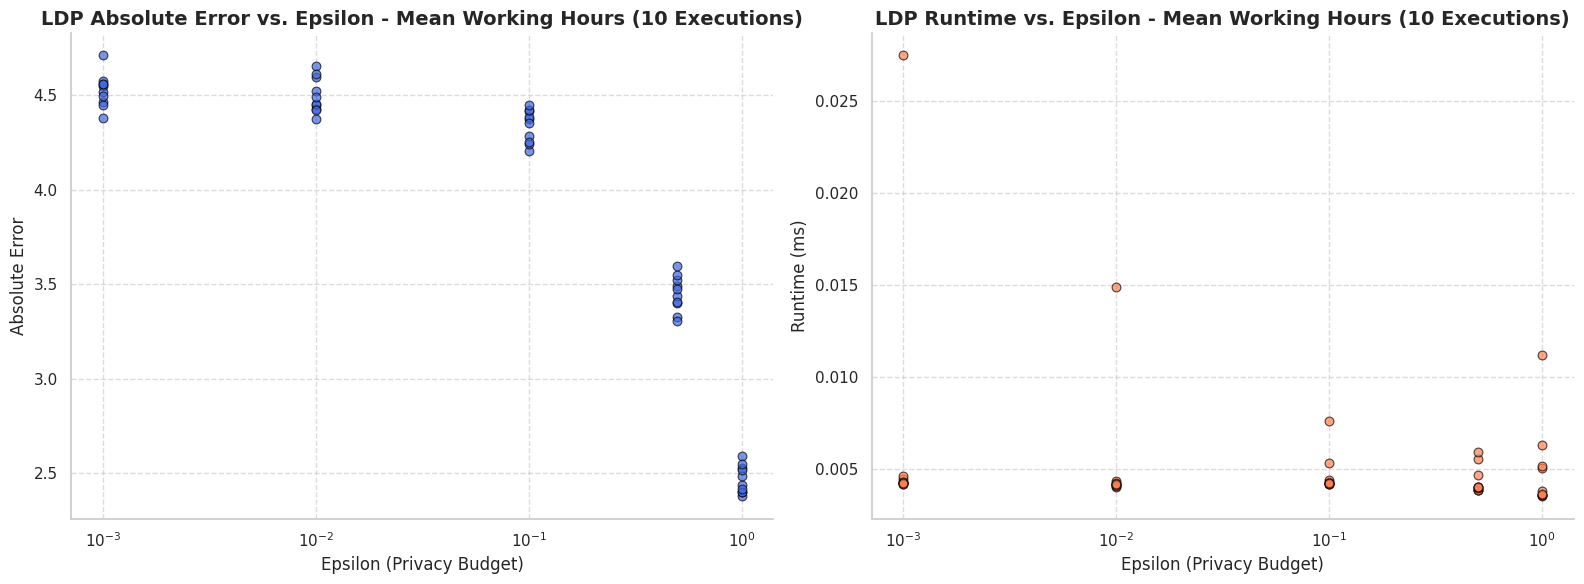

In [68]:
# Better Visual
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# --- Plot 1: Absolute Error ---
sns.scatterplot(x='Epsilon', y='Absolute Error', data=ldp_results_df,
                ax=axes[0], alpha=0.7, color='royalblue', s=40,  # Color, transparency, marker size
                edgecolor='black', linewidth=0.8)  # Add edge color for markers
axes[0].set_title('LDP Absolute Error vs. Epsilon - Mean Working Hours (10 Executions)', fontsize=14, fontweight='bold')
axes[0].set_xlabel('Epsilon (Privacy Budget)', fontsize=12)
axes[0].set_ylabel('Absolute Error', fontsize=12)
axes[0].set_xscale('log')
axes[0].grid(True, linestyle='--', alpha=0.7)  # Add a subtle grid
axes[0].spines['top'].set_visible(False)  # Remove top and right spines
axes[0].spines['right'].set_visible(False)

# --- Plot 2: Runtime ---
sns.scatterplot(x='Epsilon', y='Runtime (ms)', data=ldp_results_df,
                ax=axes[1], alpha=0.7, color='coral', s=40,
                edgecolor='black', linewidth=0.8)
axes[1].set_title('LDP Runtime vs. Epsilon - Mean Working Hours (10 Executions)', fontsize=14, fontweight='bold')
axes[1].set_xlabel('Epsilon (Privacy Budget)', fontsize=12)
axes[1].set_ylabel('Runtime (ms)', fontsize=12)
axes[1].set_xscale('log')
axes[1].grid(True, linestyle='--', alpha=0.7)
axes[1].spines['top'].set_visible(False)
axes[1].spines['right'].set_visible(False)

plt.tight_layout()
plt.show()

In [69]:
ldp_results_df

,Epsilon,Execution,True Mean Hour,LDP Mean Hour,Absolute Error,Runtime (ms)
0,0.001,1,40.938017,45.487020,4.549003,0.004496
1,0.010,1,40.938017,45.461302,4.523285,0.004207
2,0.100,1,40.938017,45.357569,4.419552,0.004193
3,0.500,1,40.938017,44.267480,3.329464,0.004688
4,1.000,1,40.938017,43.316240,2.378223,0.011212
5,0.001,2,40.938017,45.318694,4.380678,0.027492
6,0.010,2,40.938017,45.387997,4.449980,0.014920
7,0.100,2,40.938017,45.143625,4.205608,0.007616
8,0.500,2,40.938017,44.340432,3.402415,0.004045
9,1.000,2,40.938017,43.341957,2.403941,0.003605


In [66]:
combined_df['hours-per-week'].mean()


np.float64(40.93801689443191)

In [70]:
combined_df['hours-per-week'].max()


99

In [71]:
combined_df['hours-per-week'].min()


1

## Sum of Working Hours by Sex

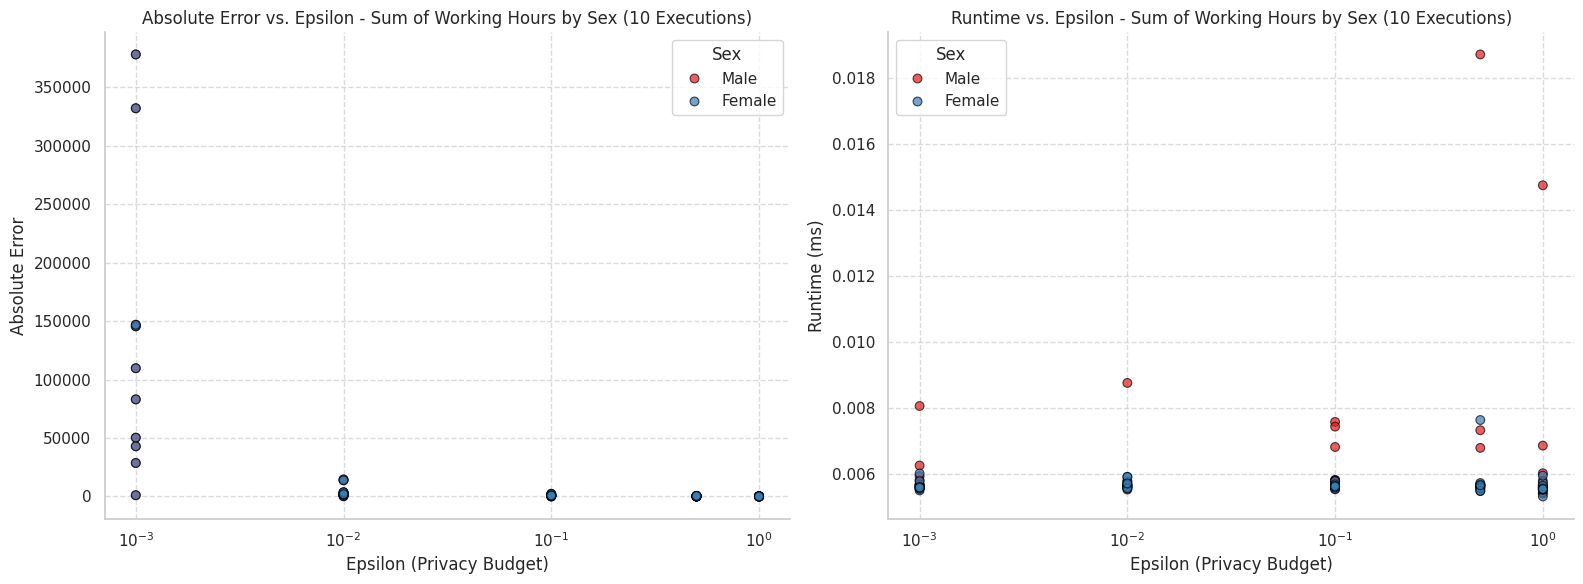

In [88]:
# Create a combined DataFrame for easier analysis
combined_df = pd.concat([filtered_X, filtered_y], axis=1)

# Define privacy budgets (epsilon) for CDP with Laplace mechanism
epsilon_values = [0.001, 0.01, 0.1, 0.5, 1]

# Laplace mechanism for CDP (using epsilon directly)
def laplace_mechanism_cdp(value, epsilon, sensitivity):
    """
    Implements the Laplace mechanism for Concentrated Differential Privacy.

    Args:
        value: True value to be privatized.
        epsilon: Privacy budget (epsilon).
        sensitivity: Sensitivity of the query.

    Returns:
        Privatized value.
    """
    scale = sensitivity / epsilon  # Calculate noise scale
    noise = np.random.laplace(0, scale)  # Generate Laplace noise
    return value + noise

# Measure runtime
def measure_runtime(func, value, epsilon, num_iterations=1000):
    start_time = time.time()
    for _ in range(num_iterations):
        func(value, epsilon, sensitivity)  # Call the mechanism function
    end_time = time.time()
    return ((end_time - start_time) / num_iterations) * 1000  # ms

# Calculate results for 10 executions
num_executions = 10
all_results = []  # List to store results from all executions

# Sensitivity for the sum of working hours
sensitivity = combined_df['hours-per-week'].max() - combined_df['hours-per-week'].min()  # Maximum possible change in sum for one individual

for sex in ['Male', 'Female']:
    # Calculate true sum of working hours for this sex
    true_sum_hours = combined_df[combined_df['sex'] == sex]['hours-per-week'].sum()

    for execution in range(num_executions):
        np.random.seed(42 + execution)  # Different seed for each execution
        results = []  # Results for this execution

        for epsilon in epsilon_values:
            dp_sum_hours = laplace_mechanism_cdp(true_sum_hours, epsilon, sensitivity)
            runtime = measure_runtime(laplace_mechanism_cdp, true_sum_hours, epsilon)
            abs_error = abs(true_sum_hours - dp_sum_hours)

            results.append({
                'Sex': sex,
                'Epsilon': epsilon,
                'Execution': execution + 1,  # Add execution number
                'True Sum Hours': true_sum_hours,
                'DP Sum Hours': dp_sum_hours,
                'Absolute Error': abs_error,
                'Runtime (ms)': round(runtime, 6)
            })

        all_results.extend(results)  # Add results from this execution to the main list

results_df = pd.DataFrame(all_results)  # Create DataFrame from all results

# Create a figure with two subplots
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# --- Plot 1: Absolute Error ---
sns.scatterplot(x='Epsilon', y='Absolute Error', hue='Sex', data=results_df,
                ax=axes[0], alpha=0.7, palette='Set1', s=40, edgecolor='black', linewidth=0.8)
axes[0].set_title('Absolute Error vs. Epsilon - Sum of Working Hours by Sex (10 Executions)')
axes[0].set_xlabel('Epsilon (Privacy Budget)')
axes[0].set_ylabel('Absolute Error')
axes[0].set_xscale('log')
axes[0].grid(True, linestyle='--', alpha=0.7)
axes[0].spines['top'].set_visible(False)
axes[0].spines['right'].set_visible(False)

# --- Plot 2: Runtime ---
sns.scatterplot(x='Epsilon', y='Runtime (ms)', hue='Sex', data=results_df,
                ax=axes[1], alpha=0.7, palette='Set1', s=40, edgecolor='black', linewidth=0.8)
axes[1].set_title('Runtime vs. Epsilon - Sum of Working Hours by Sex (10 Executions)')
axes[1].set_xlabel('Epsilon (Privacy Budget)')
axes[1].set_ylabel('Runtime (ms)')
axes[1].set_xscale('log')
axes[1].grid(True, linestyle='--', alpha=0.7)
axes[1].spines['top'].set_visible(False)
axes[1].spines['right'].set_visible(False)

plt.tight_layout()
plt.show()

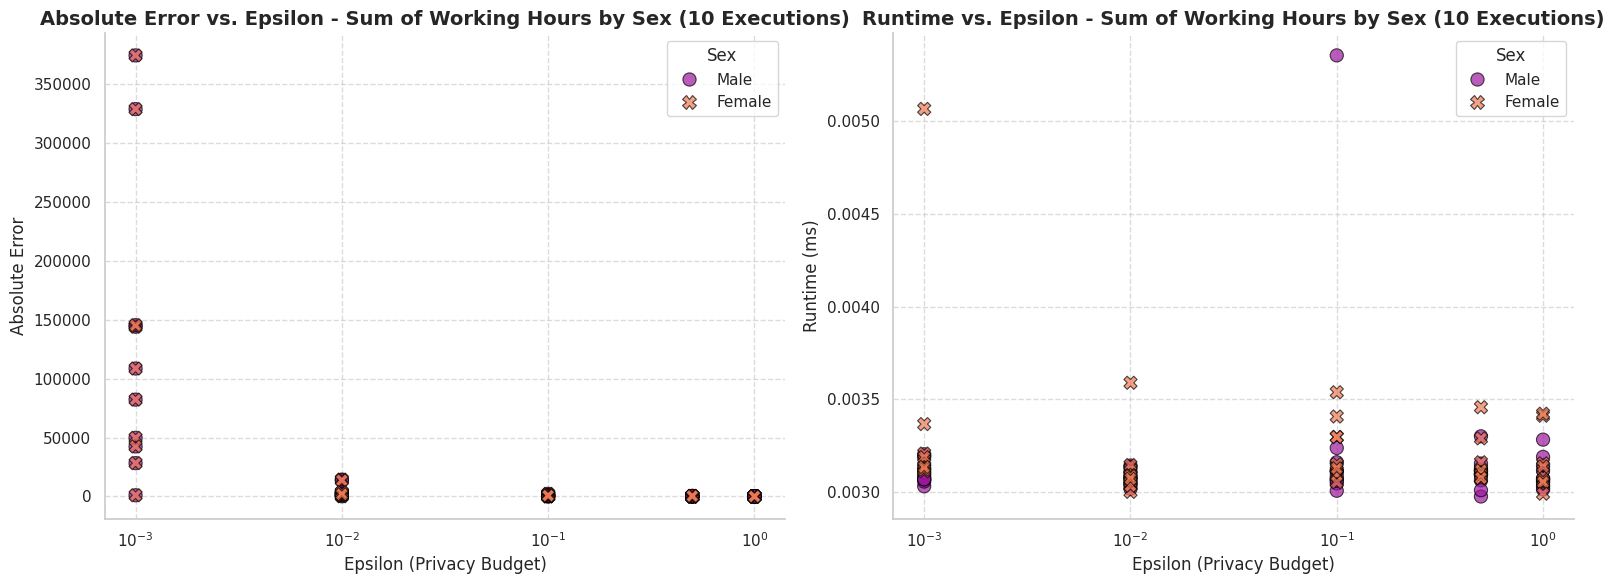

In [85]:
# Create a figure with two subplots
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# --- Plot 1: Absolute Error ---
sns.scatterplot(x='Epsilon', y='Absolute Error', hue='Sex', data=results_df,
                ax=axes[0], palette='plasma', style='Sex', alpha=0.7, s=90,  # Color, transparency, marker size
                edgecolor='black', linewidth=0.8)  # Add edge color for markers
axes[0].set_title('Absolute Error vs. Epsilon - Sum of Working Hours by Sex (10 Executions)', fontsize=14, fontweight='bold')
axes[0].set_xlabel('Epsilon (Privacy Budget)', fontsize=12)
axes[0].set_ylabel('Absolute Error', fontsize=12)
axes[0].set_xscale('log')
axes[0].grid(True, linestyle='--', alpha=0.7)  # Add a subtle grid
axes[0].spines['top'].set_visible(False)  # Remove top and right spines
axes[0].spines['right'].set_visible(False)

# --- Plot 2: Runtime ---
sns.scatterplot(x='Epsilon', y='Runtime (ms)', hue='Sex', data=results_df,
                ax=axes[1], palette='plasma', style='Sex', alpha=0.7, s=90,
                edgecolor='black', linewidth=0.8)
axes[1].set_title('Runtime vs. Epsilon - Sum of Working Hours by Sex (10 Executions)', fontsize=14, fontweight='bold')
axes[1].set_xlabel('Epsilon (Privacy Budget)', fontsize=12)
axes[1].set_ylabel('Runtime (ms)', fontsize=12)
axes[1].set_xscale('log')
axes[1].grid(True, linestyle='--', alpha=0.7)
axes[1].spines['top'].set_visible(False)
axes[1].spines['right'].set_visible(False)

plt.tight_layout()
plt.show()

In [89]:
results_df

,Sex,Epsilon,Execution,True Sum Hours,DP Sum Hours,Absolute Error,Runtime (ms)
0,Male,0.001,1,1308570,1.279968e+06,28602.008303,0.005568
1,Male,0.010,1,1308570,1.309436e+06,866.474389,0.005524
2,Male,0.100,1,1308570,1.310227e+06,1657.285041,0.005541
3,Male,0.500,1,1308570,1.308627e+06,56.894586,0.007320
4,Male,1.000,1,1308570,1.308450e+06,119.689901,0.006018
...,...,...,...,...,...,...,...
95,Female,0.001,10,542729,5.855996e+05,42870.560192,0.005584
96,Female,0.010,10,542729,5.445889e+05,1859.915243,0.005710
97,Female,0.100,10,542729,5.435056e+05,776.641369,0.005617
98,Female,0.500,10,542729,5.432639e+05,534.941777,0.007629


## LDP Sum of Working Hours by Sex

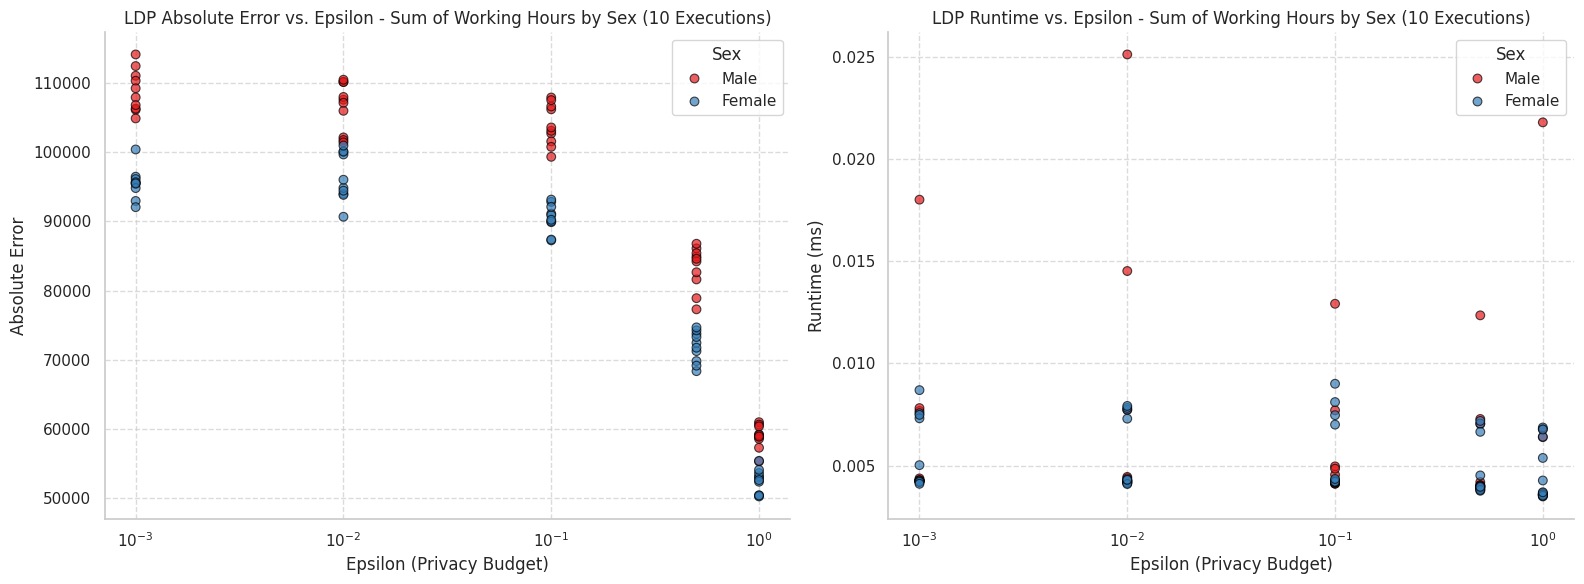

In [86]:
# Create a combined DataFrame for easier analysis
combined_df = pd.concat([filtered_X, filtered_y], axis=1)

# Define privacy budgets (epsilon) for LDP
epsilon_values_ldp = [0.001, 0.01, 0.1, 0.5, 1.0]

# Randomized Response for sum of working hours
def randomized_response_sum_hours(value, epsilon, domain=[1, 99]):
    """
    Implements randomized response for Local Differential Privacy for sum of hours.

    Args:
        value: True sum of working hours.
        epsilon: Privacy parameter.
        domain: Possible range of working hours.

    Returns:
        Privatized sum of working hours.
    """
    p = np.exp(epsilon) / (1 + np.exp(epsilon))
    if np.random.random() < p:
        return value
    else:
        return np.random.randint(domain[0], domain[1] + 1)

# Function to measure runtime
def measure_ldp_runtime(func, value, epsilon, domain, num_iterations=1000):
    start_time = time.time()
    for _ in range(num_iterations):
        func(value, epsilon, domain)
    end_time = time.time()
    return ((end_time - start_time) / num_iterations) * 1000  # ms

# Calculate results for LDP with multiple executions
num_executions = 10
all_results = []  # List to store results from all executions

for sex in ['Male', 'Female']:
    # Get subset of data for this sex
    subset = combined_df[combined_df['sex'] == sex]

    # Calculate true sum of working hours for this sex
    true_sum_hours = subset['hours-per-week'].sum()

    for execution in range(num_executions):
        np.random.seed(42 + execution)  # Different seed for each execution
        results = []  # Results for this execution

        for epsilon in epsilon_values_ldp:
            # Measure average runtime
            sample_hours = 40  # Arbitrary sample hours for runtime measurement
            runtime = measure_ldp_runtime(randomized_response_sum_hours, sample_hours, epsilon, [1, 99])

            # Apply randomized response to each individual's working hours
            privatized_hours = [randomized_response_sum_hours(hours, epsilon, [1, 99]) for hours in subset['hours-per-week']]

            # Calculate the sum of privatized hours
            ldp_sum_hours = np.sum(privatized_hours)

            # Calculate error metrics
            abs_error = abs(true_sum_hours - ldp_sum_hours)

            results.append({
                'Sex': sex,
                'Epsilon': epsilon,
                'Execution': execution + 1,  # Add execution number
                'True Sum Hours': true_sum_hours,
                'LDP Sum Hours': ldp_sum_hours,
                'Absolute Error': abs_error,
                'Runtime (ms)': round(runtime, 6)
            })

        all_results.extend(results)  # Add results from this execution to the main list

ldp_results_df = pd.DataFrame(all_results)  # Create DataFrame from all results

# Create a figure with two subplots
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# --- Plot 1: Absolute Error ---
sns.scatterplot(x='Epsilon', y='Absolute Error', hue='Sex', data=ldp_results_df,
                ax=axes[0], alpha=0.7, palette='Set1', s=40, edgecolor='black', linewidth=0.8)
axes[0].set_title('LDP Absolute Error vs. Epsilon - Sum of Working Hours by Sex (10 Executions)')
axes[0].set_xlabel('Epsilon (Privacy Budget)')
axes[0].set_ylabel('Absolute Error')
axes[0].set_xscale('log')
axes[0].grid(True, linestyle='--', alpha=0.7)
axes[0].spines['top'].set_visible(False)
axes[0].spines['right'].set_visible(False)

# --- Plot 2: Runtime ---
sns.scatterplot(x='Epsilon', y='Runtime (ms)', hue='Sex', data=ldp_results_df,
                ax=axes[1], alpha=0.7, palette='Set1', s=40, edgecolor='black', linewidth=0.8)
axes[1].set_title('LDP Runtime vs. Epsilon - Sum of Working Hours by Sex (10 Executions)')
axes[1].set_xlabel('Epsilon (Privacy Budget)')
axes[1].set_ylabel('Runtime (ms)')
axes[1].set_xscale('log')
axes[1].grid(True, linestyle='--', alpha=0.7)
axes[1].spines['top'].set_visible(False)
axes[1].spines['right'].set_visible(False)

plt.tight_layout()
plt.show()

In [87]:
ldp_results_df

,Sex,Epsilon,Execution,True Sum Hours,LDP Sum Hours,Absolute Error,Runtime (ms)
0,Male,0.001,1,1308570,1419613,111043,0.004305
1,Male,0.010,1,1308570,1414546,105976,0.004245
2,Male,0.100,1,1308570,1411278,102708,0.004971
3,Male,0.500,1,1308570,1393482,84912,0.004203
4,Male,1.000,1,1308570,1365850,57280,0.003591
...,...,...,...,...,...,...,...
95,Female,0.001,10,542729,638216,95487,0.004119
96,Female,0.010,10,542729,643683,100954,0.004318
97,Female,0.100,10,542729,634826,92097,0.004356
98,Female,0.500,10,542729,614467,71738,0.003973
